TASK 1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
from sklearn.linear_model import HuberRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data=pd.read_csv('Gurgaon_RealEstate.csv')
data.head()


property_type                      society      sector  price  \
0          flat      signature global park 4   sector 36   0.82   
1          flat             smart world gems   sector 89   0.95   
2          flat                pyramid elite   sector 86   0.46   
3          flat       breez global hill view  sohna road   0.32   
4          flat  bestech park view sanskruti   sector 92   1.60   

   price_per_sqft     area                                       areaWithType  \
0          7585.0   1081.0  Super Built up area 1081(100.43 sq.m.)Carpet a...   
1          8600.0   1105.0                   Carpet area: 1103 (102.47 sq.m.)   
2            79.0  58228.0                 Carpet area: 58141 (5401.48 sq.m.)   
3          5470.0    585.0  Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...   
4          8020.0   1995.0  Super Built up area 1995(185.34 sq.m.)Built Up...   

   bedRoom  bathroom balcony  ...  super_built_up_area built_up_area  \
0        3         2       2  ...               1081.0           NaN   
1        2         2       2  ...                  NaN           NaN   
2        2         2       1  ...                  NaN           NaN   
3        2         2       1  ...                  NaN        1000.0   
4        3         4      3+  ...               1995.0        1615.0   

  carpet_area  study room  servant room  store room  pooja room  others  \
0       650.0           0             0           0           0       0   
1      1103.0           1             1           0           0       0   
2     58141.0           0             0           0           0       0   
3       585.0           0             0           0           0       0   
4      1476.0           0             1           0           0       1   

   furnishing_type  luxury_score  
0                0             8  
1                0            38  
2                0            15  
3                0            49  
4                1           174  

[5 rows x 23 columns]

In [ ]:
df = pd.DataFrame(data,
                  columns = ['property_type', 'society', 'sector', 'price','price_per_sqft','area','areaWithType',
                             'bedRoom','bathroom','balcony','super_built_up_area',
                             'built_up_area','carpet_area','studyroom','servantroom','poojaroom','others','furnishing_type','luxury_score'])

In [ ]:
datatypes = df.dtypes

In [ ]:
df.dtypes

property_type           object
society                 object
sector                  object
price                  float64
price_per_sqft         float64
area                   float64
areaWithType            object
bedRoom                  int64
bathroom                 int64
balcony                 object
super_built_up_area    float64
built_up_area          float64
carpet_area            float64
studyroom              float64
servantroom            float64
poojaroom              float64
others                   int64
furnishing_type          int64
luxury_score             int64
dtype: object

In [ ]:
df = pd.DataFrame(data,
                  columns = ['property_type', 'society', 'sector', 'price','price_per_sqft','area','areaWithType',
                             'bedRoom','bathroom','balcony','super_built_up_area',
                             'built_up_area','carpet_area','studyroom','servantroom','poojaroom','others','furnishing_type','luxury_score'])

In [ ]:
df=pd.DataFrame(data)
display(df.drop_duplicates())

property_type                              society      sector  price  \
0             flat              signature global park 4   sector 36   0.82   
1             flat                     smart world gems   sector 89   0.95   
2             flat                        pyramid elite   sector 86   0.46   
3             flat               breez global hill view  sohna road   0.32   
4             flat          bestech park view sanskruti   sector 92   1.60   
...            ...                                  ...         ...    ...   
3798          flat                       pivotal devaan   sector 84   0.37   
3799         house  international city by sobha phase 1  sector 109   6.00   
3800          flat           ansal api celebrity suites    sector 2   0.60   
3801         house                          independent   sector 43  15.50   
3802          flat                           m3m ikonic   sector 68   1.78   

      price_per_sqft     area  \
0             7585.0   1081.0   
1             8600.0   1105.0   
2               79.0  58228.0   
3             5470.0    585.0   
4             8020.0   1995.0   
...              ...      ...   
3798          6346.0    583.0   
3799          9634.0   6228.0   
3800          8163.0    735.0   
3801         28233.0   5490.0   
3802          9128.0   1950.0   

                                           areaWithType  bedRoom  bathroom  \
0     Super Built up area 1081(100.43 sq.m.)Carpet a...        3         2   
1                      Carpet area: 1103 (102.47 sq.m.)        2         2   
2                    Carpet area: 58141 (5401.48 sq.m.)        2         2   
3     Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...        2         2   
4     Super Built up area 1995(185.34 sq.m.)Built Up...        3         4   
...                                                 ...      ...       ...   
3798  Super Built up area 583(54.16 sq.m.)Carpet are...        2         2   
3799                         Plot area 692(578.6 sq.m.)        5         5   
3800               Super Built up area 735(68.28 sq.m.)        1         1   
3801                        Plot area 610(510.04 sq.m.)        5         6   
3802  Super Built up area 1950(181.16 sq.m.)Built Up...        3         3   

     balcony  ...  super_built_up_area built_up_area carpet_area  study room  \
0          2  ...               1081.0           NaN       650.0           0   
1          2  ...                  NaN           NaN      1103.0           1   
2          1  ...                  NaN           NaN     58141.0           0   
3          1  ...                  NaN        1000.0       585.0           0   
4         3+  ...               1995.0        1615.0      1476.0           0   
...      ...  ...                  ...           ...         ...         ...   
3798       1  ...                583.0           NaN       483.0           0   
3799      3+  ...                  NaN        6228.0         NaN           1   
3800       1  ...                735.0           NaN         NaN           0   
3801       3  ...                  NaN        5490.0         NaN           1   
3802      3+  ...               1950.0        1845.0      1530.0           0   

      servant room  store room  pooja room  others  furnishing_type  \
0                0           0           0       0                0   
1                1           0           0       0                0   
2                0           0           0       0                0   
3                0           0           0       0                0   
4                1           0           0       1                1   
...            ...         ...         ...     ...              ...   
3798             0           0           0       0                0   
3799             1           1           1       0                0   
3800             0           0           0       0                1   
3801             1           1           1       0             

In [ ]:
#checking the missing values in the specific column

numerical_cols = df.select_dtypes(include=['int', 'float']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

missing_numerical = df[numerical_cols].isnull().sum()
missing_categorical = df[categorical_cols].isnull().sum()

print("Numerical columns with missing values:")
print(missing_numerical[missing_numerical > 0])

print("\nCategorical columns with missing values:")
print(missing_categorical[missing_categorical > 0])


Numerical columns with missing values:
price                    18
price_per_sqft           18
area                     18
floorNum                 19
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

Categorical columns with missing values:
society       1
facing     1105
dtype: int64


In [ ]:
#Exploring property type column
selected_column = data['property_type']

<Axes: xlabel='property_type'>

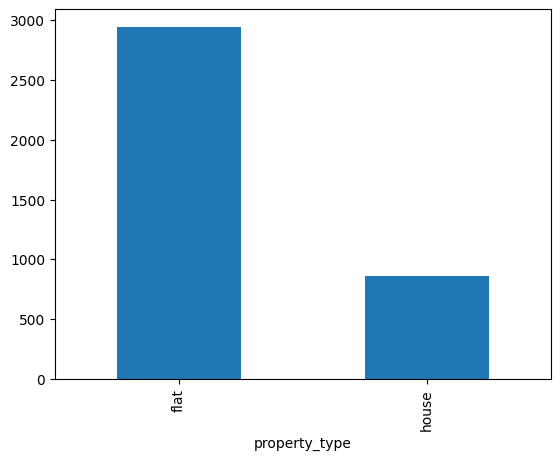

In [ ]:
#Plotting bar plot for property type
df['property_type'].value_counts().plot(kind='bar')

In [ ]:
#exploring the society  feature
selected_column = data['society']

In [ ]:

# Assuming you have a DataFrame named 'data' with a column named 'society'
society_counts = data['society'].value_counts()

min_count_threshold = 10
societies_to_keep = society_counts[society_counts >= min_count_threshold].index
filtered_data = data[data['society'].isin(societies_to_keep)]
filtered_counts = filtered_data['society'].value_counts()
print(filtered_counts)


society
independent                             486
tulip violet                             75
ss the leaf                              74
shapoorji pallonji joyville gurugram     45
dlf new town heights                     42
                                       ... 
pyramid urban homes 2                    10
breez global hill view                   10
zara aavaas                              10
ramprastha the edge towers               10
signature global synera                  10
Name: count, Length: 100, dtype: int64


In [ ]:
# Remove rows where 'society' column contains 'independent'
filtered_data = filtered_data[~filtered_data['society'].str.strip().str.lower().eq('independent')]

filtered_counts_without_independent = filtered_data['society'].value_counts()
print(filtered_counts_without_independent)

society
tulip violet                            75
ss the leaf                             74
shapoorji pallonji joyville gurugram    45
dlf new town heights                    42
signature global park                   37
                                        ..
pyramid urban homes 2                   10
breez global hill view                  10
zara aavaas                             10
ramprastha the edge towers              10
signature global synera                 10
Name: count, Length: 99, dtype: int64


In [ ]:

# Check for missing values in all columns
missing_values = df.isnull().sum()


print("Columns having missing values:")
print(missing_values[missing_values > 0])


Columns having missing values:
society                   1
price                    18
price_per_sqft           18
area                     18
floorNum                 19
facing                 1105
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64


In [ ]:
#exploring the sector column
selected_column = data['sector']

In [ ]:
# Assuming 'sector_column' is the column containing sector information
sector_column = 'sector'

sector_counts = df['sector'].value_counts()

top_15_sectors = sector_counts.head(15)

print("Top 15 Sectors:")
print(top_15_sectors)


Top 15 Sectors:
sector
sohna road    175
sector 102    113
sector 85     110
sector 92     105
sector 69      94
sector 90      91
sector 81      90
sector 65      90
sector 109     88
sector 79      80
sector 33      74
sector 104     73
sector 83      69
sector 37d     68
sector 43      67
Name: count, dtype: int64


In [ ]:
# Assuming 'sector_column' is the column containing sector information
sector_column = 'sector'
df[sector_column] = df[sector_column].astype(str)

sector_counts = df[sector_column].value_counts()
#distinct sectors in society column
total_distinct_sectors = len(sector_counts)

print("Total number of distinct sectors:", total_distinct_sectors)

Total number of distinct sectors: 104


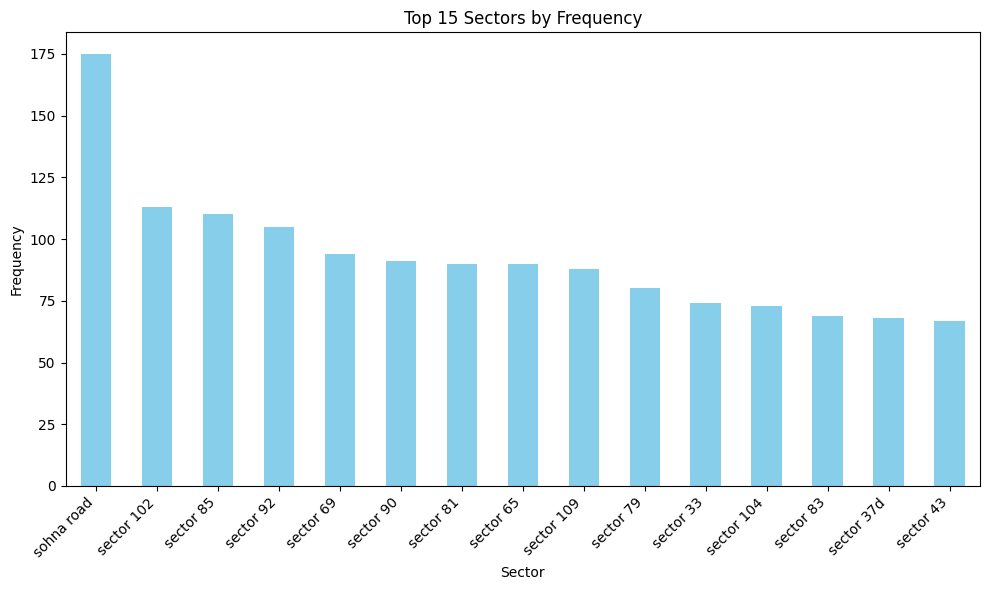

In [ ]:
# plotting for top 15 sectors

sector_column = 'sector'

sector_counts = df[sector_column].value_counts()

top_15_sectors = sector_counts.head(15)

plt.figure(figsize=(10, 6))
top_15_sectors.plot(kind='bar', color='skyblue')
plt.title('Top 15 Sectors by Frequency')
plt.xlabel('Sector')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Missing values in 'price' column: 18

Descriptive statistics of 'price' column:
count    3803.000000
mean        2.505804
std         2.943129
min         0.070000
25%         0.945000
50%         1.510000
75%         2.700000
max        31.500000
Name: price, dtype: float64


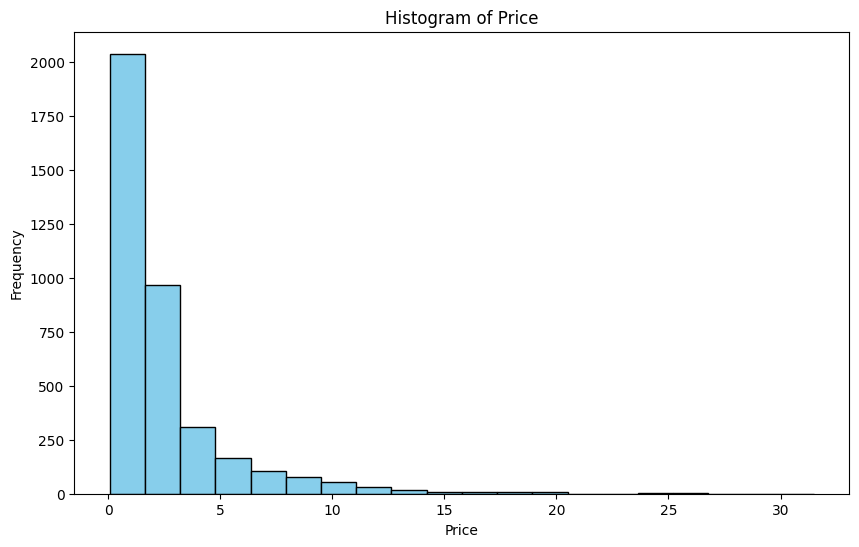

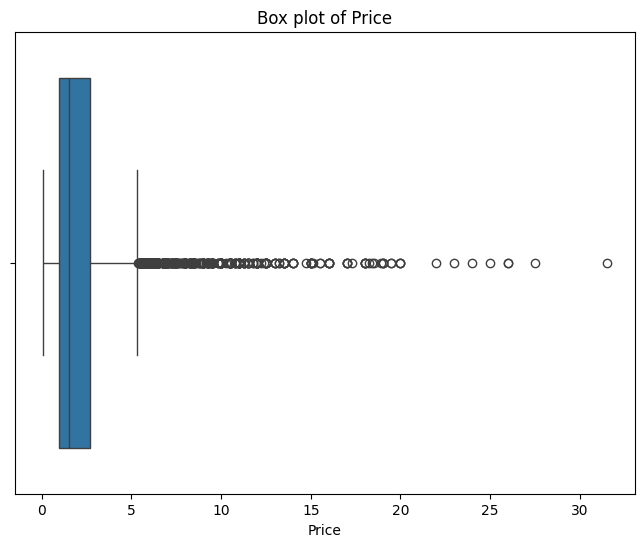

In [ ]:


# Check for missing values in the 'price' column
missing_values = df['price'].isnull().sum()
print("Missing values in 'price' column:", missing_values)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data['price'] = imputer.fit_transform(data[['price']])

print("\nDescriptive statistics of 'price' column:")
print(data['price'].describe())

# histogram of 'price'
plt.figure(figsize=(10, 6))
plt.hist(data['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# plot to check for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['price'])
plt.title('Box plot of Price')
plt.xlabel('Price')
plt.show()


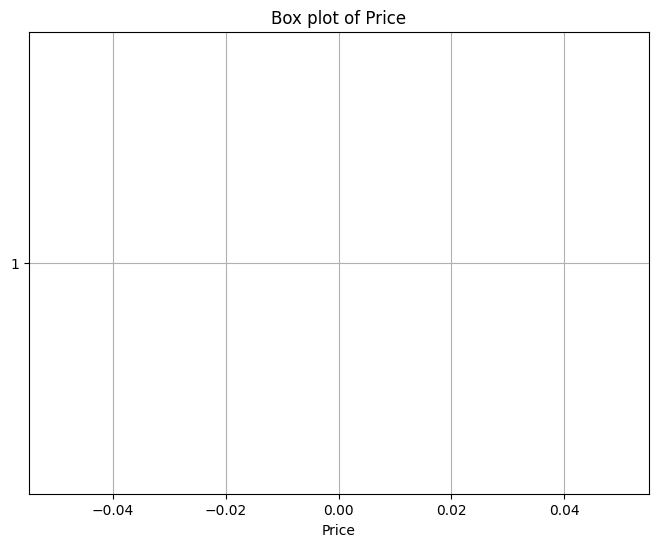

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['price'], vert=False)
plt.title('Box plot of Price')
plt.xlabel('Price')
plt.grid(True)
plt.show()


Analysis for column: price
Skewness of 'price': 3.3113346542178137
Kurtosis of 'price': 15.257818585808831


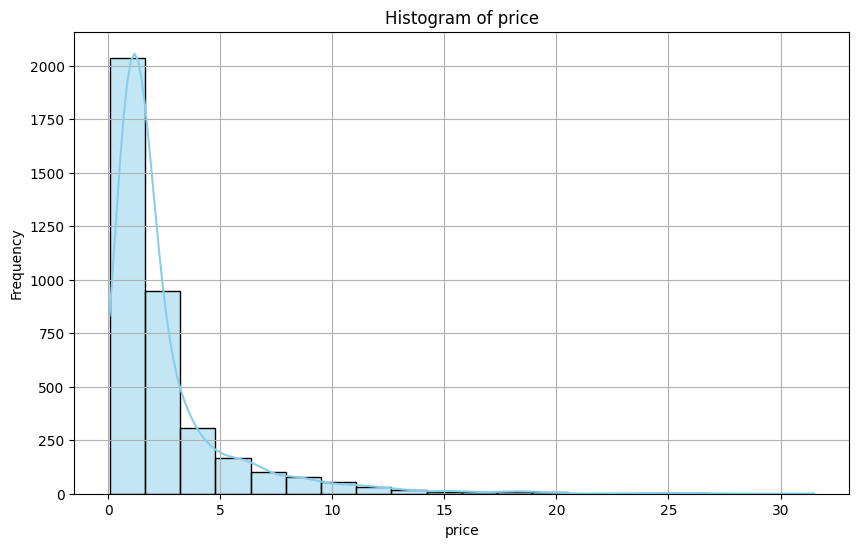

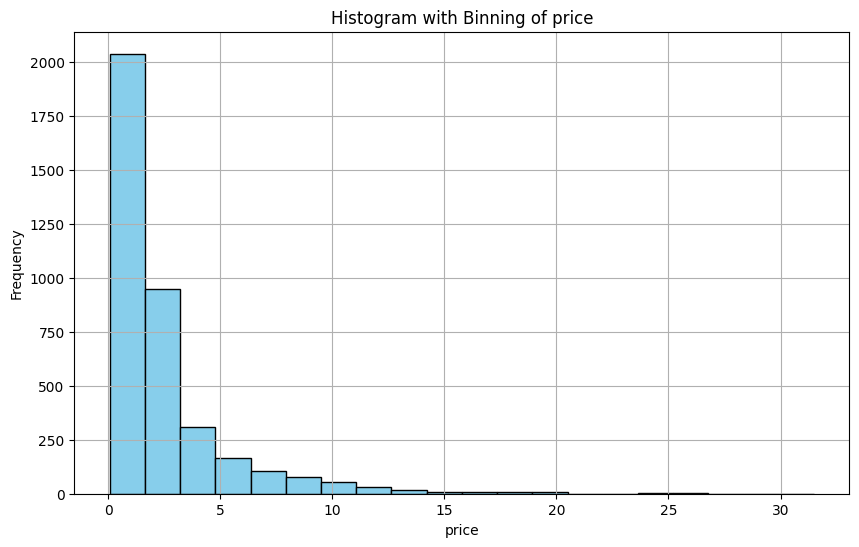

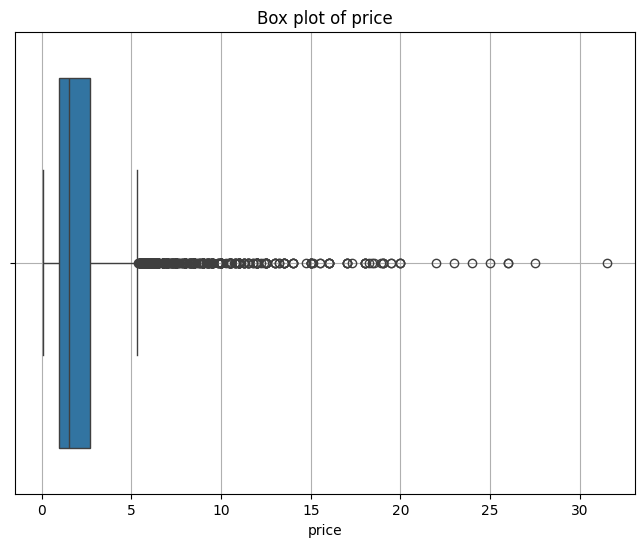


Analysis for column: price_per_sqft
Skewness of 'price_per_sqft': 11.439219959077516
Kurtosis of 'price_per_sqft': 187.04186603461412


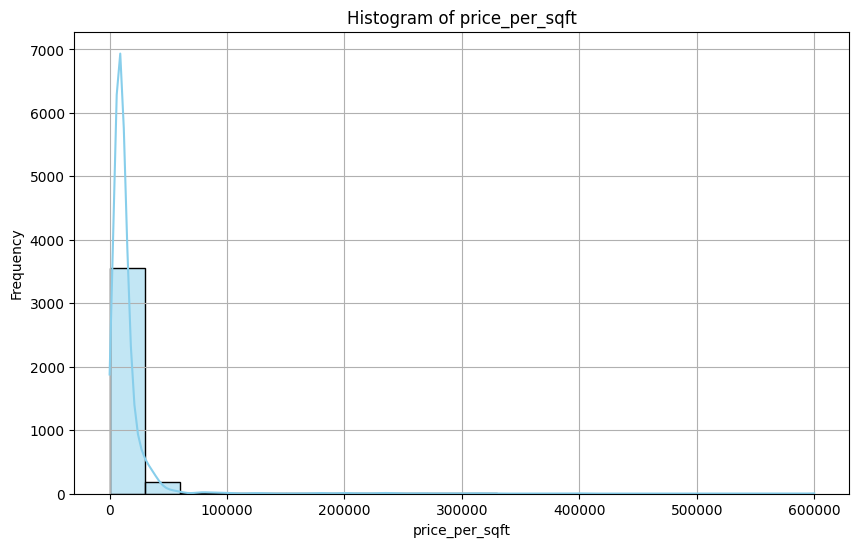

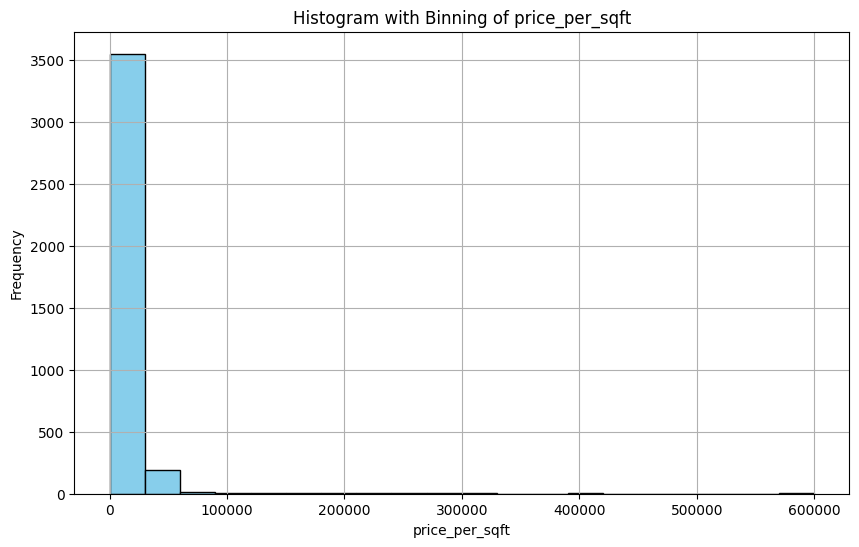

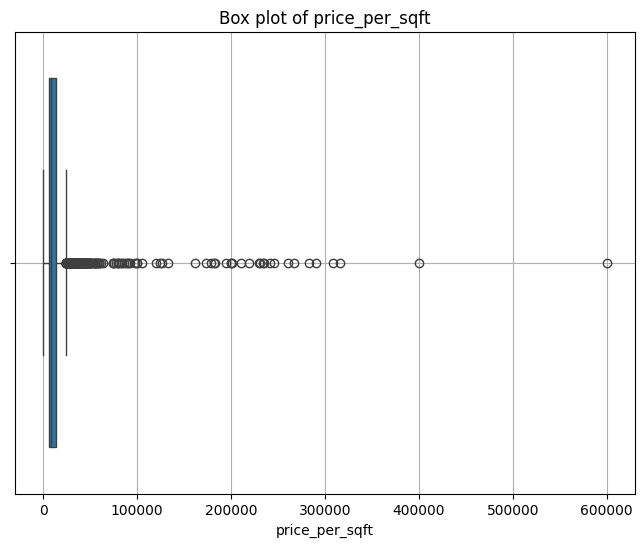


Analysis for column: bedRoom
Skewness of 'bedRoom': 3.5115390021792146
Kurtosis of 'bedRoom': 18.61025394135828


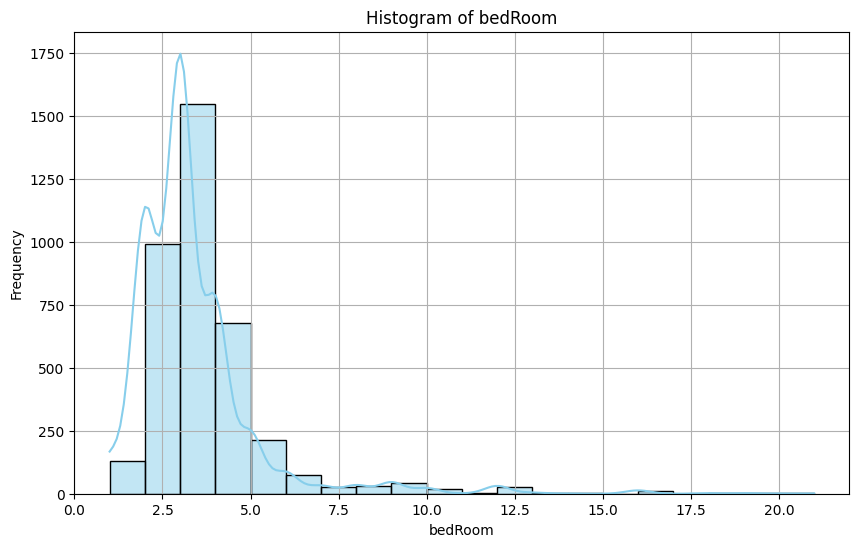

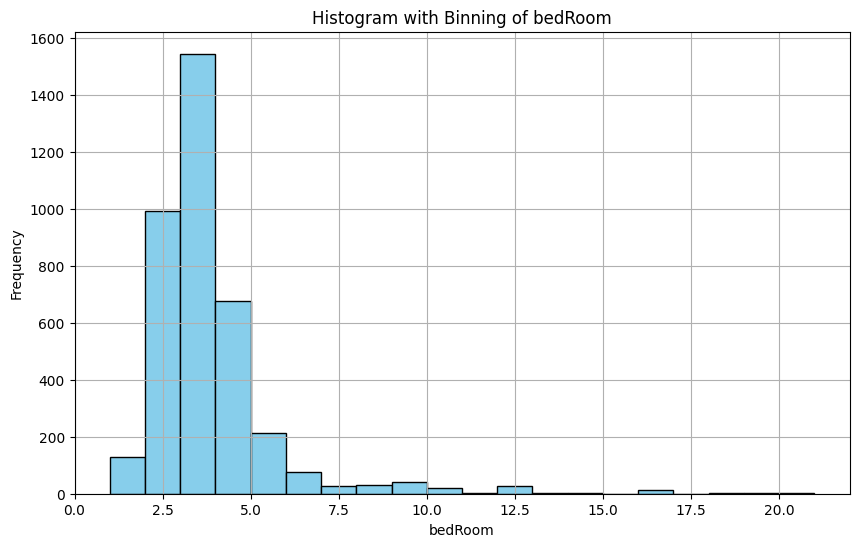

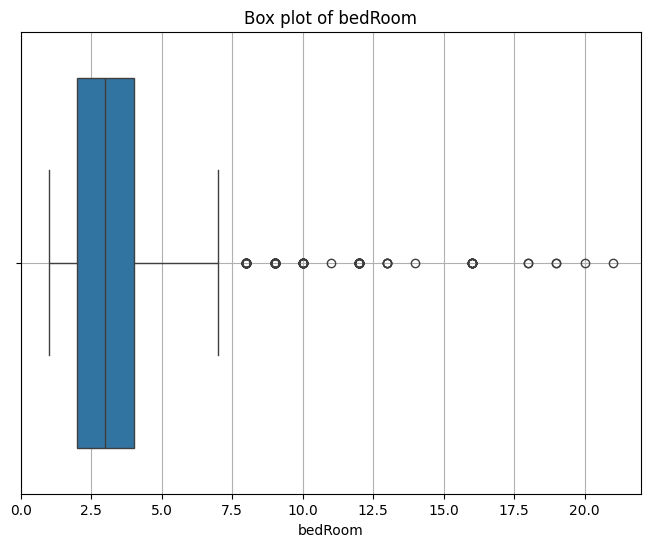


Analysis for column: bathroom
Skewness of 'bathroom': 3.257083204220492
Kurtosis of 'bathroom': 17.745174835673772


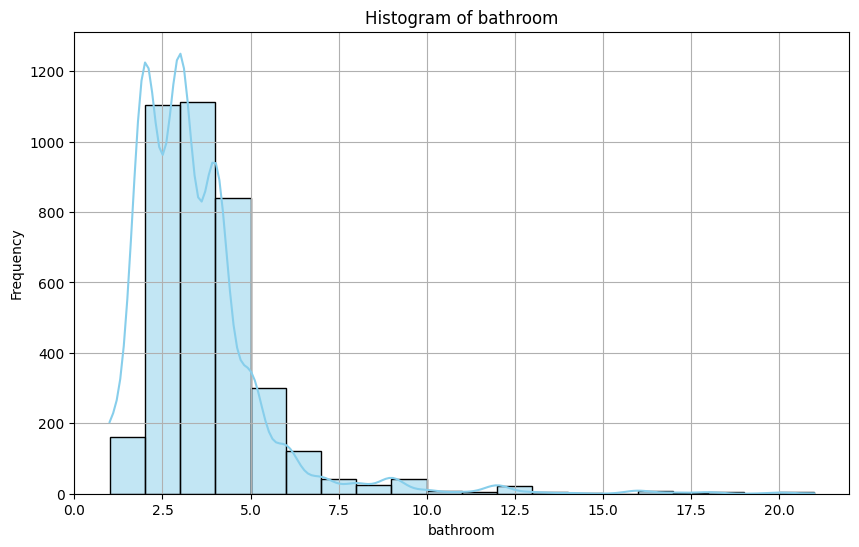

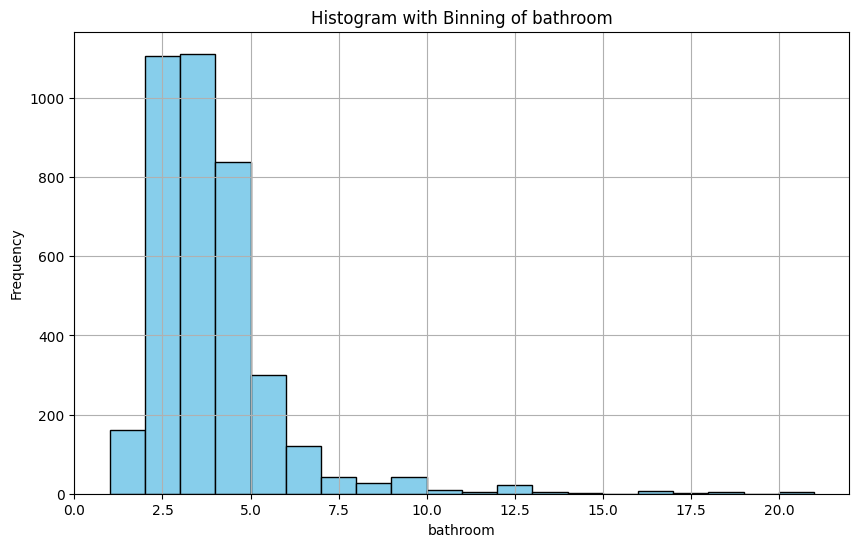

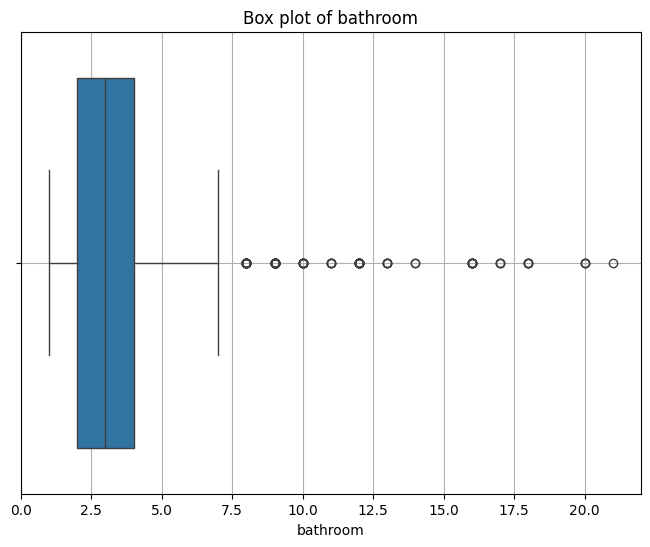


Analysis for column: balcony
Skewness of 'balcony': -0.8369569224756488
Kurtosis of 'balcony': -0.19760706152620688


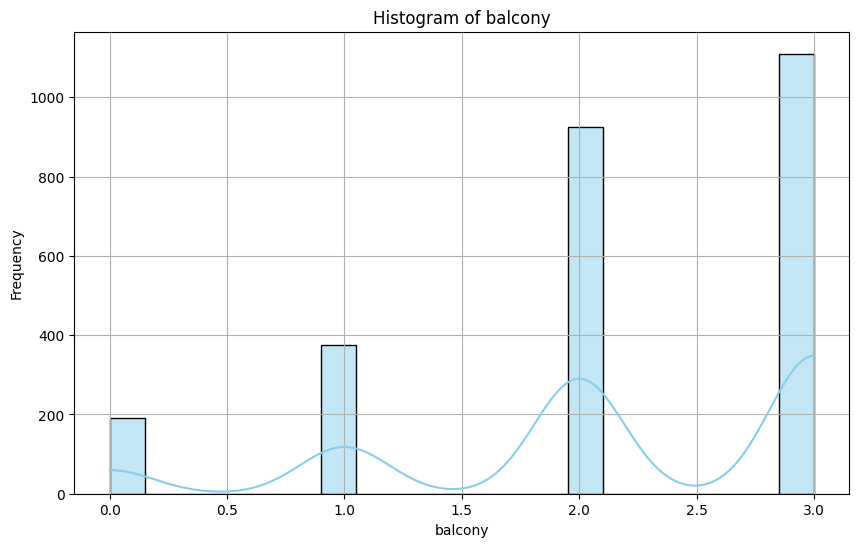

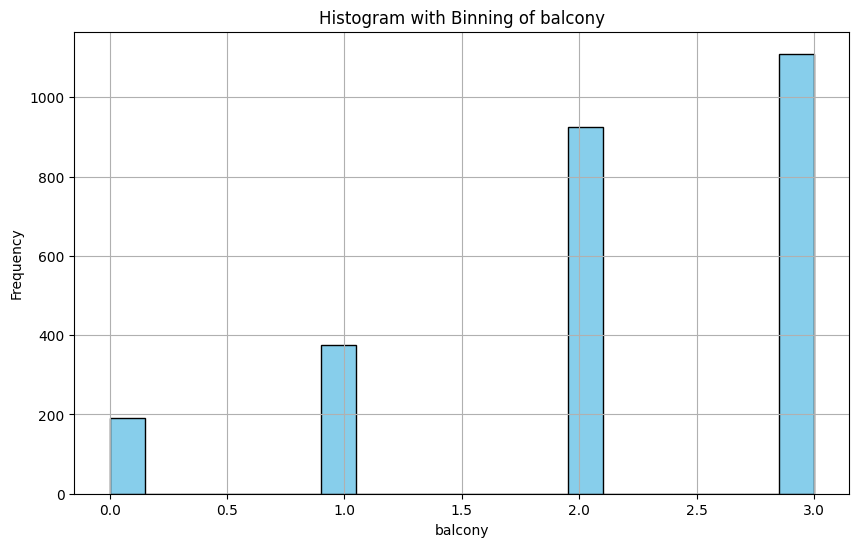

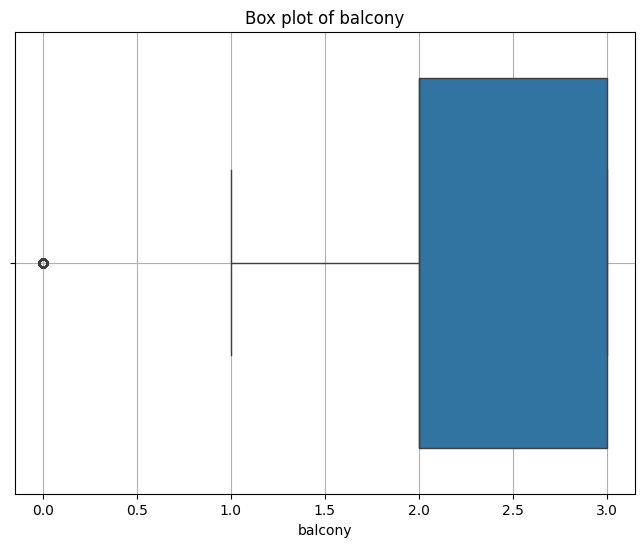


Analysis for column: floorNum
Skewness of 'floorNum': 1.6987333012368482
Kurtosis of 'floorNum': 4.549322940576371


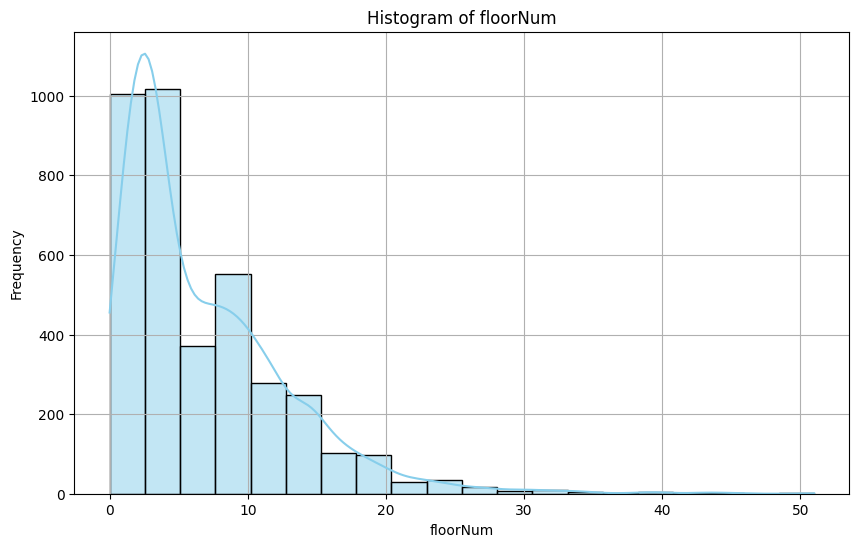

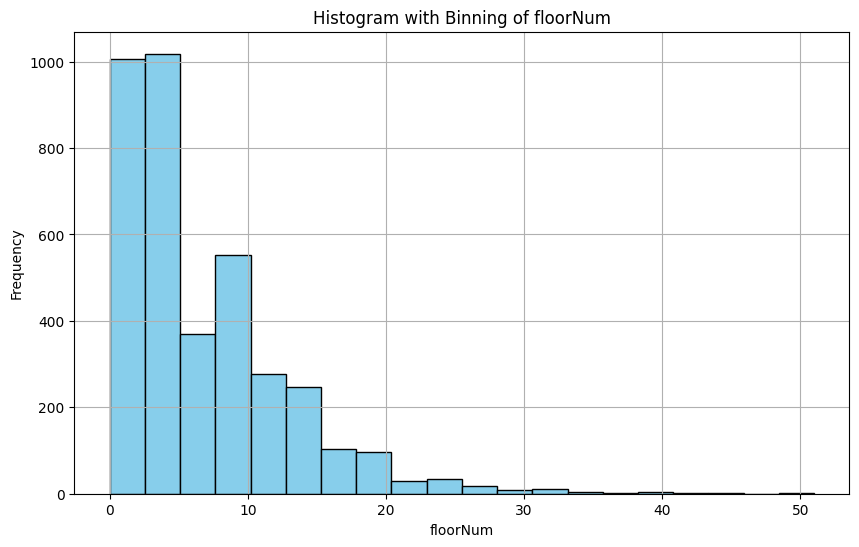

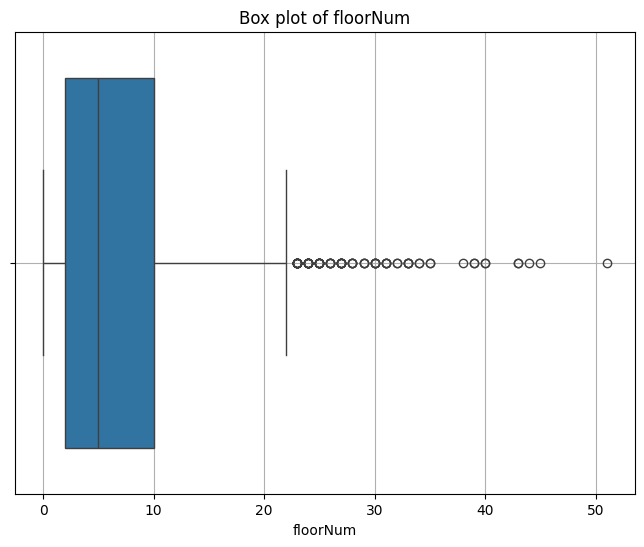


Analysis for column: super_built_up_area
Skewness of 'super_built_up_area': 1.8232284983476958
Kurtosis of 'super_built_up_area': 10.083066100658105


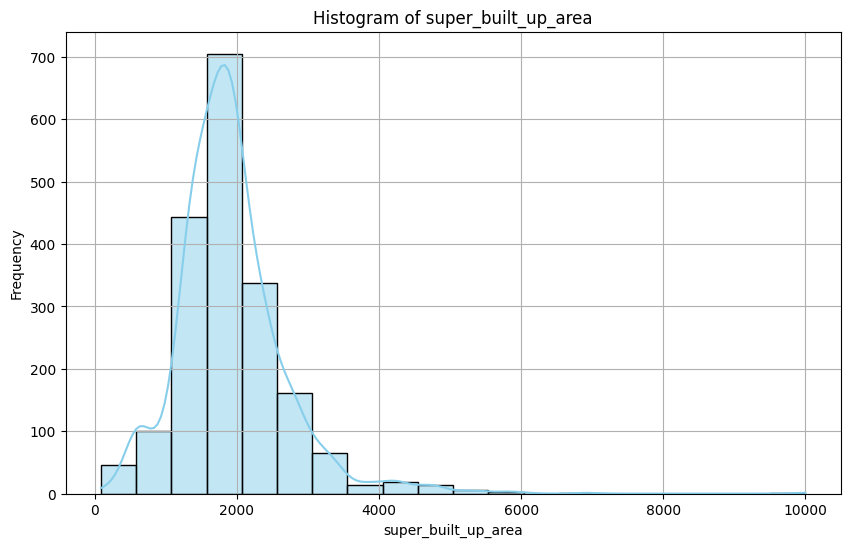

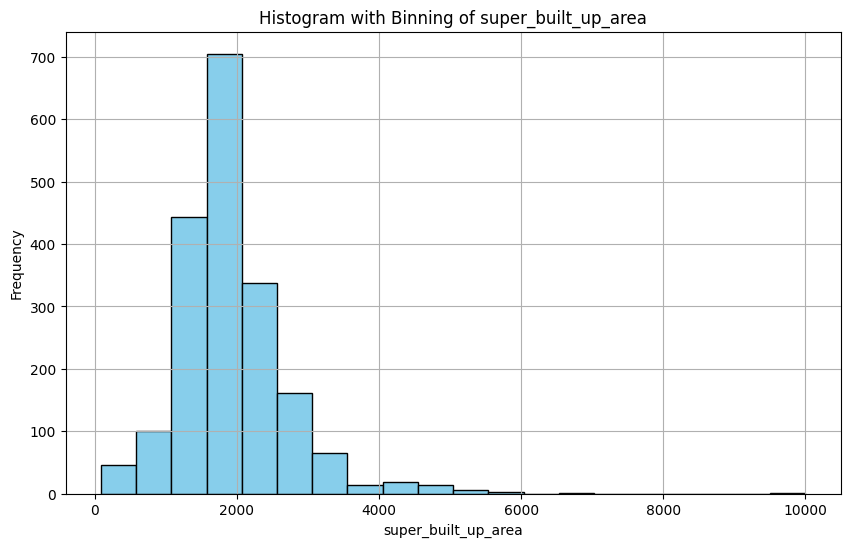

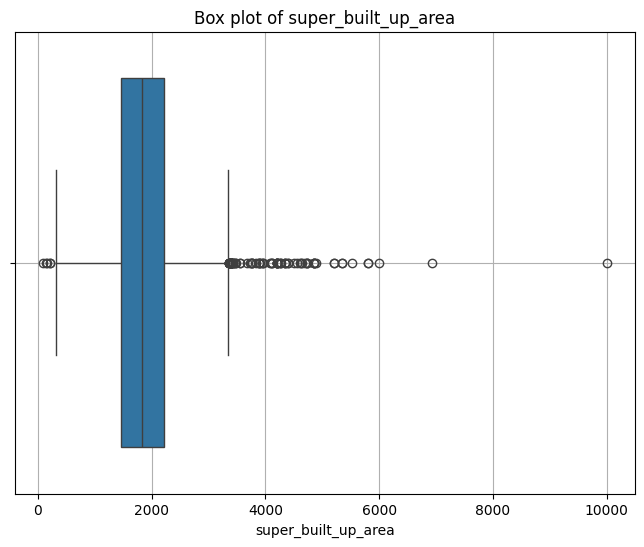


Analysis for column: built_up_area
Skewness of 'built_up_area': 41.217580082562975
Kurtosis of 'built_up_area': 1710.1077185788172


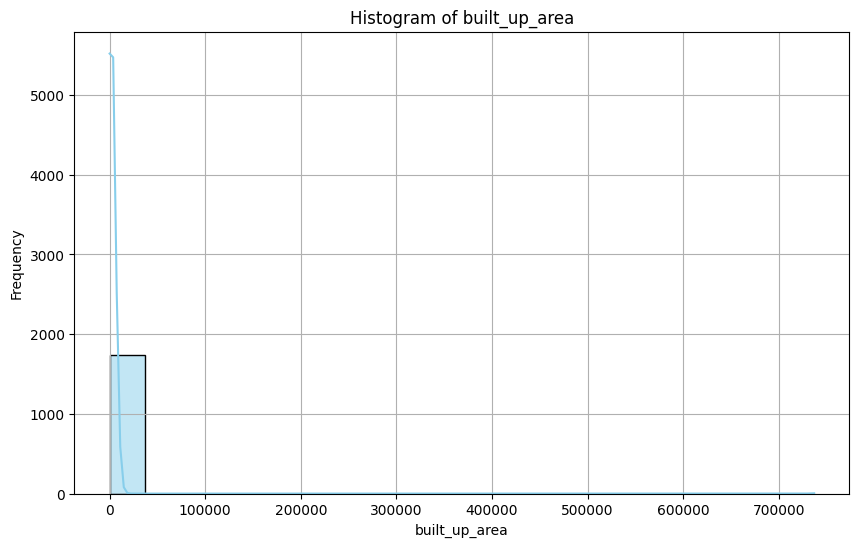

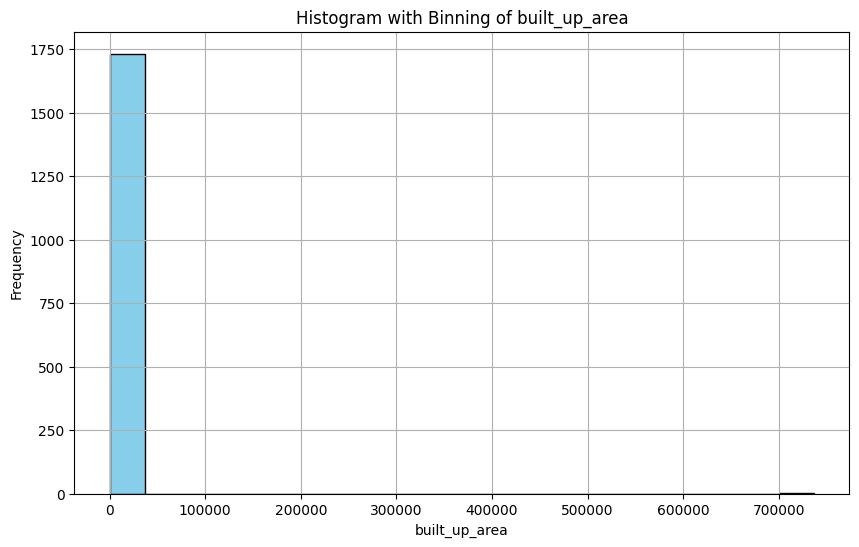

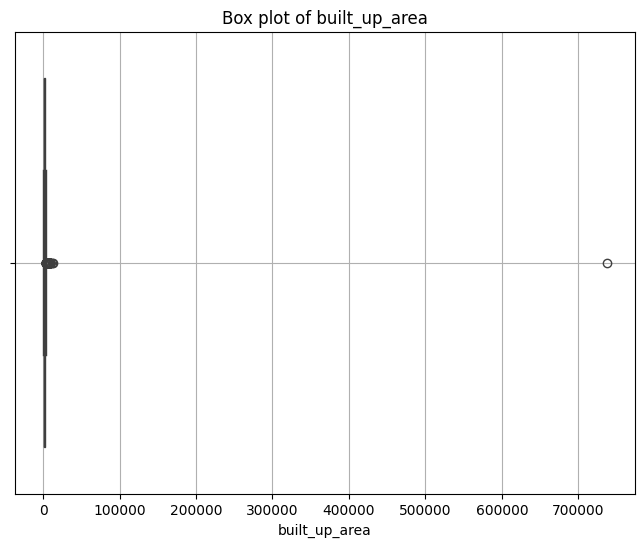


Analysis for column: carpet_area
Skewness of 'carpet_area': 24.796083599668638
Kurtosis of 'carpet_area': 627.839357284124


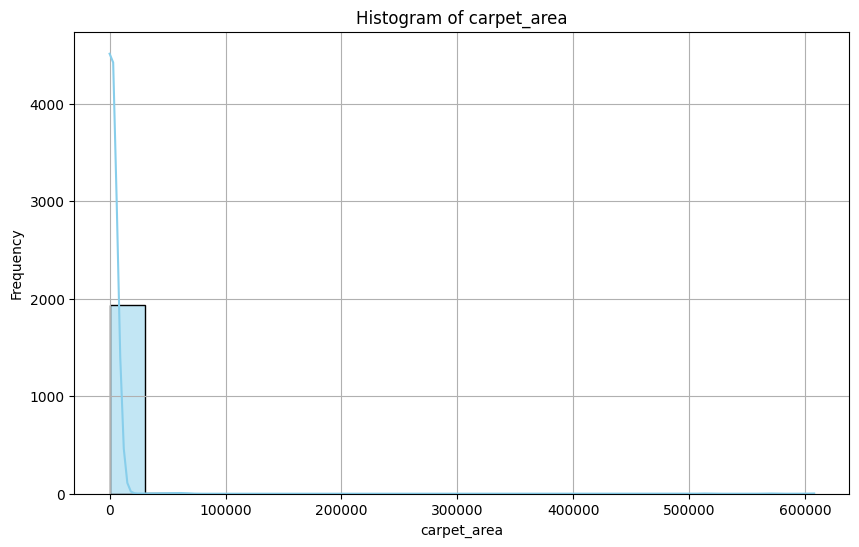

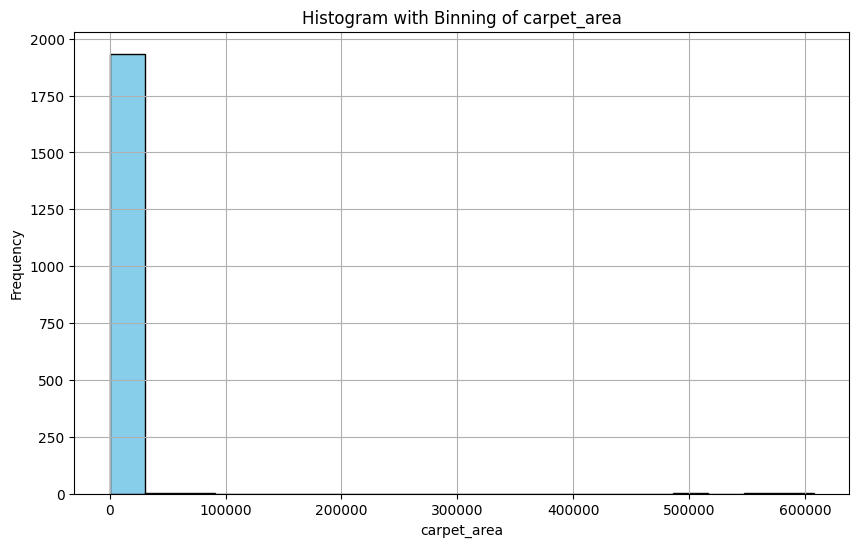

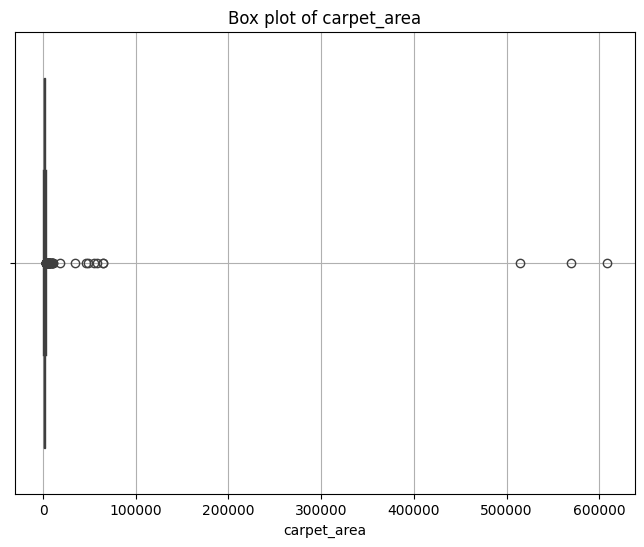


Analysis for column: study room
Skewness of 'study room': 1.5844676873884345
Kurtosis of 'study room': 0.5108062090652594


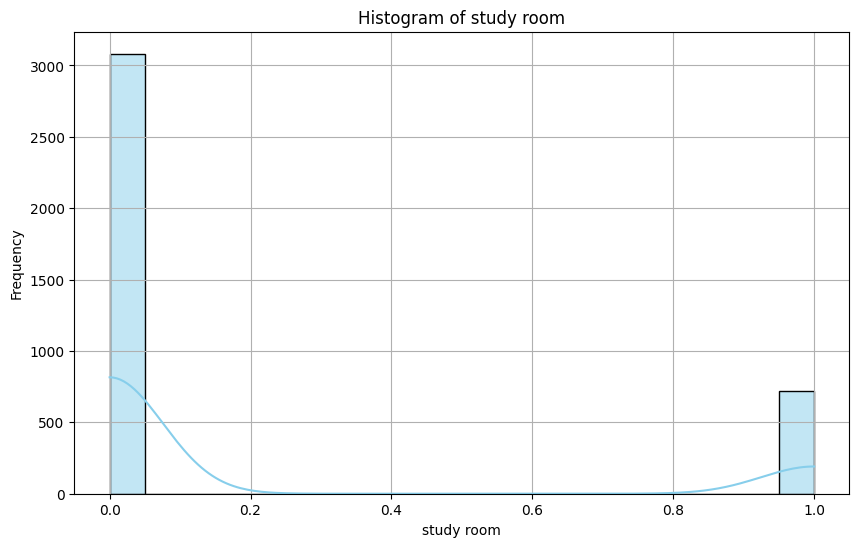

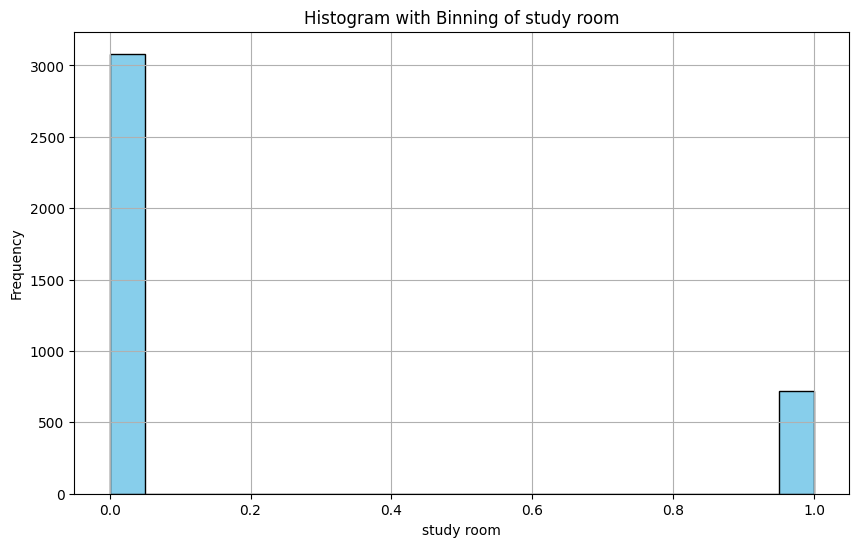

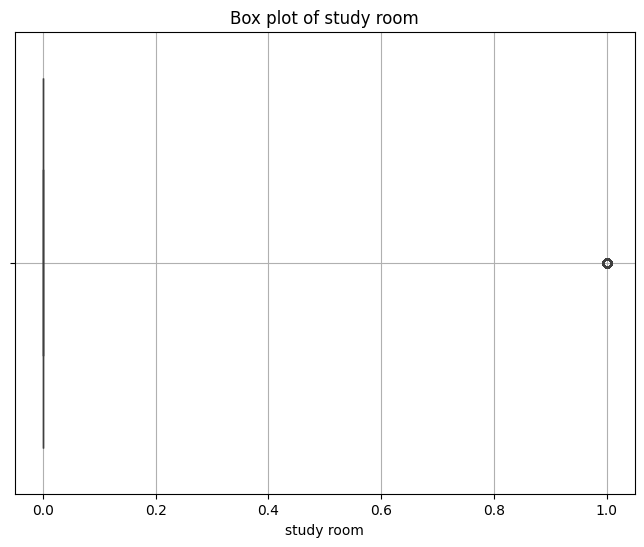


Analysis for column: servant room
Skewness of 'servant room': 0.597972317081455
Kurtosis of 'servant room': -1.6432935938628566


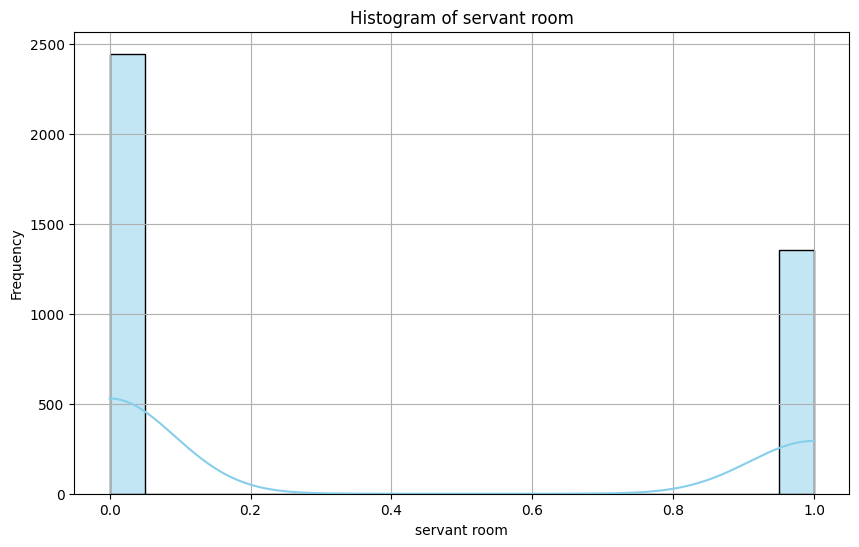

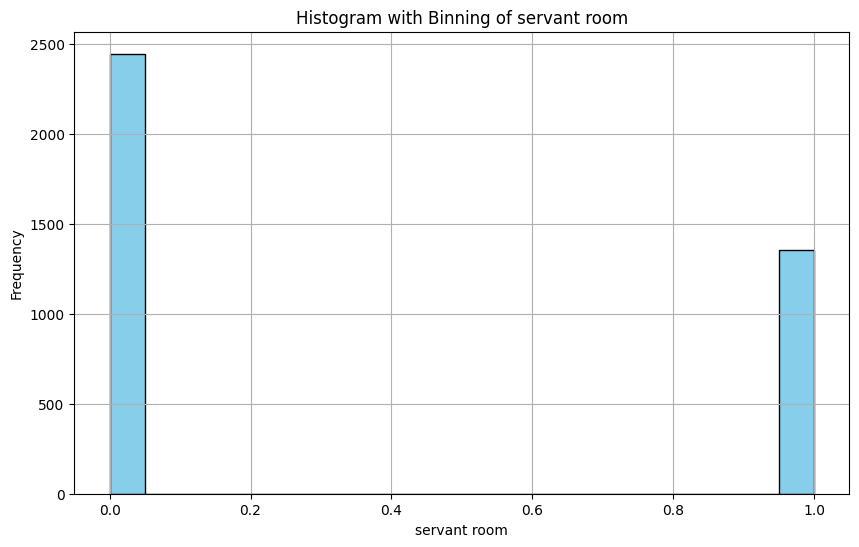

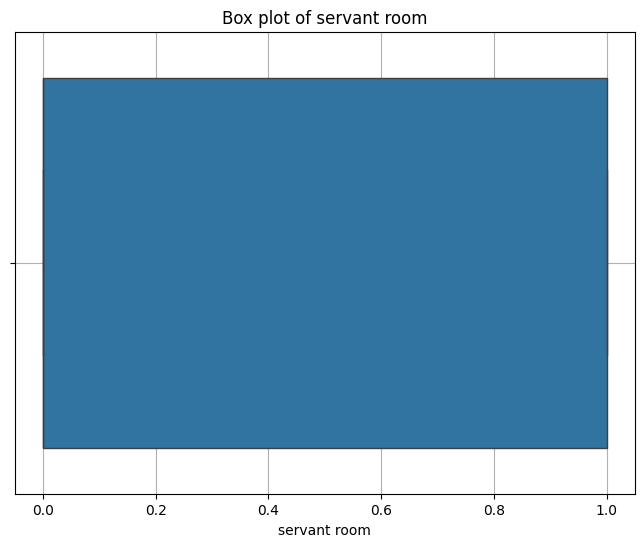


Analysis for column: store room
Skewness of 'store room': 2.856767510561787
Kurtosis of 'store room': 6.164362175001538


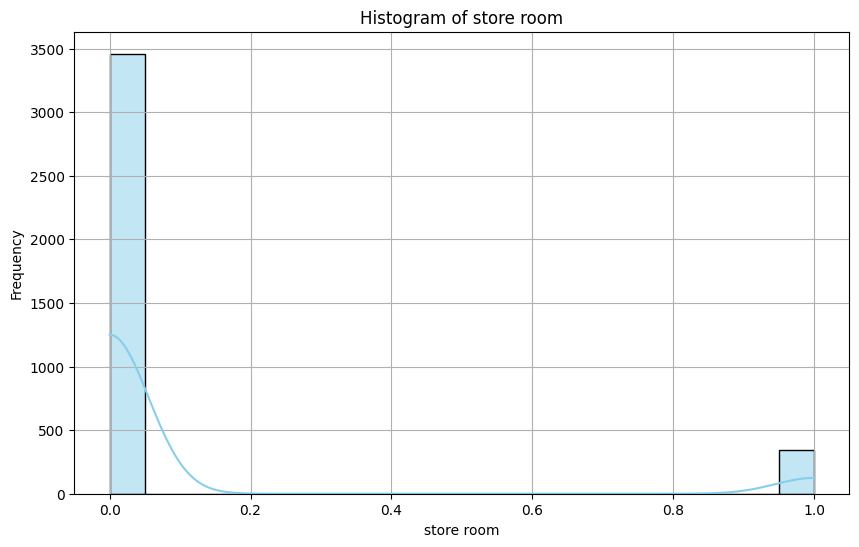

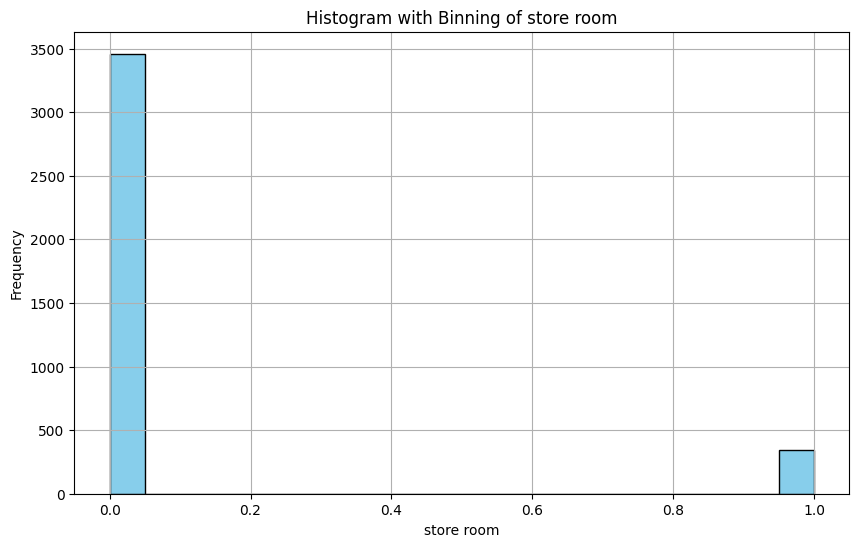

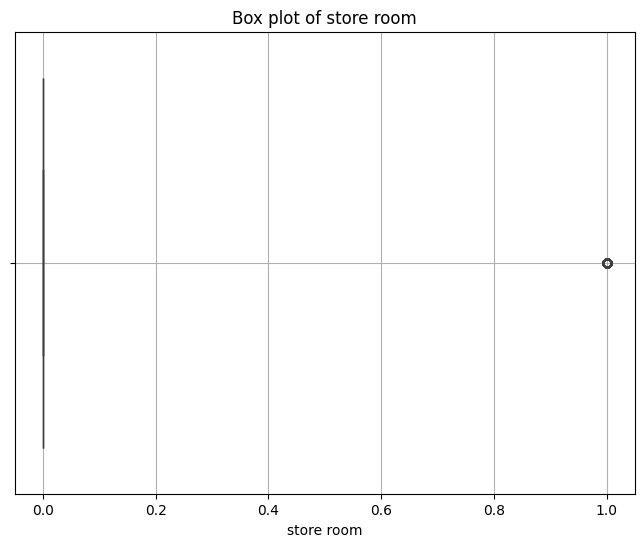


Analysis for column: pooja room
Skewness of 'pooja room': 1.7174170404503821
Kurtosis of 'pooja room': 0.9500206306784613


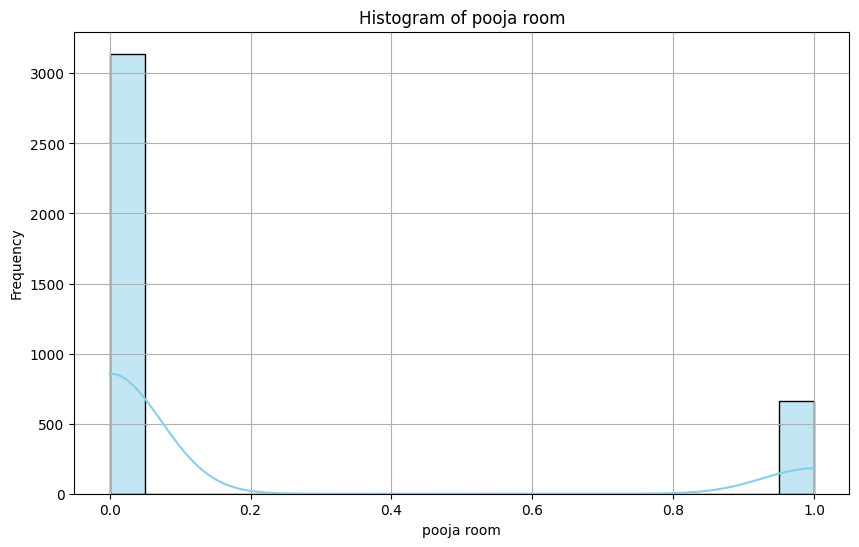

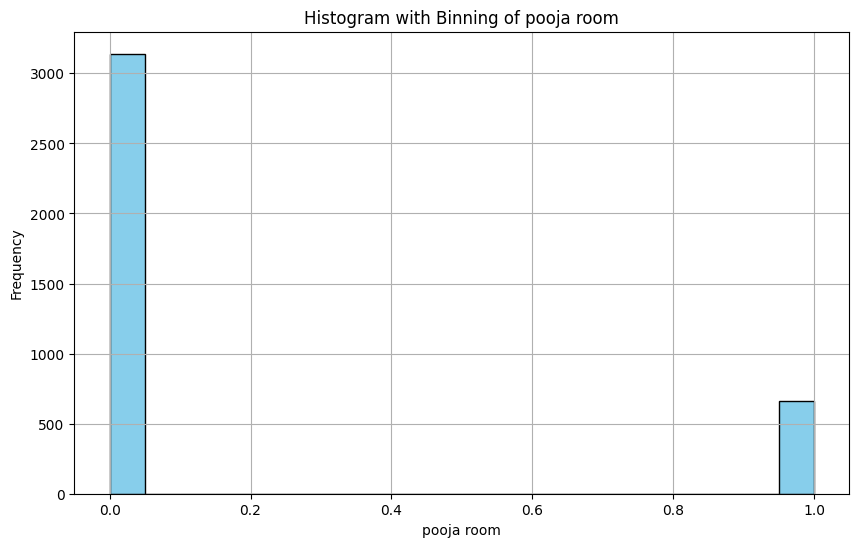

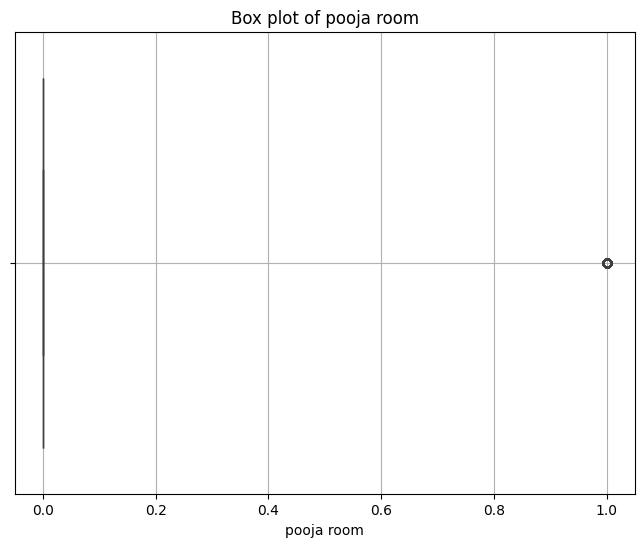


Analysis for column: others
Skewness of 'others': 2.482457986756426
Kurtosis of 'others': 4.164787644010293


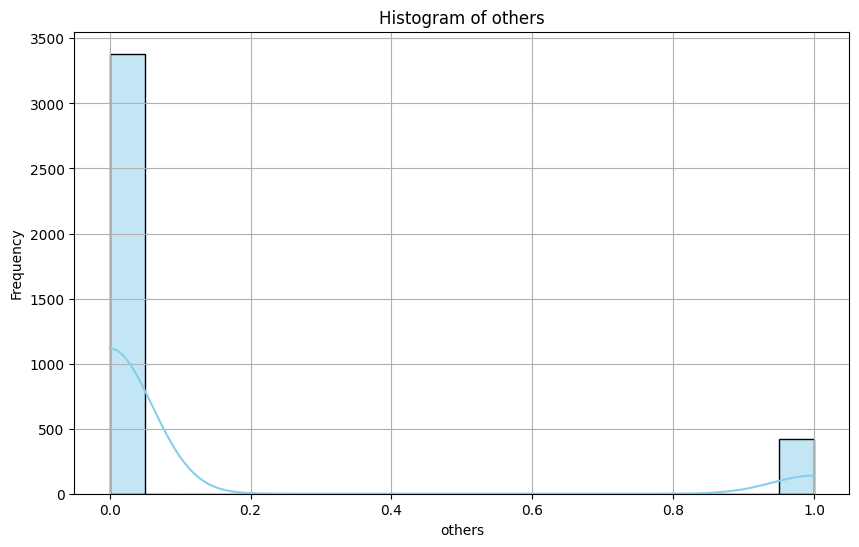

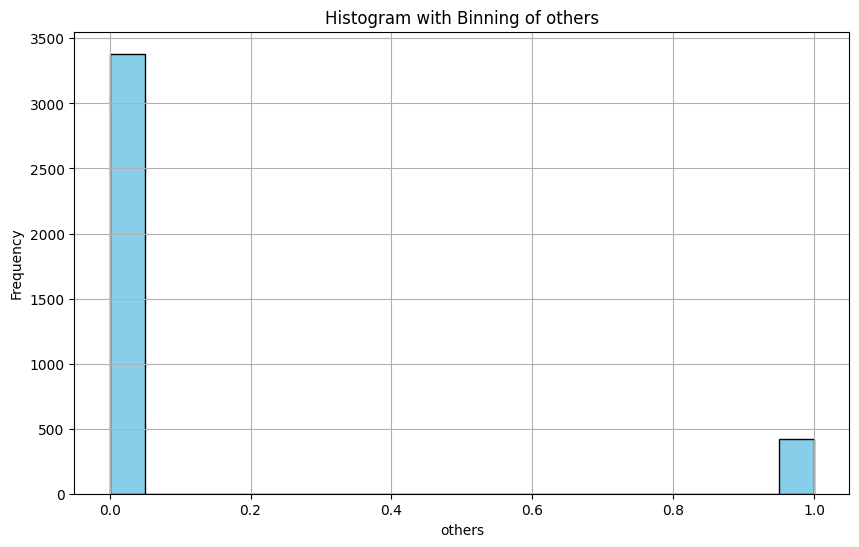

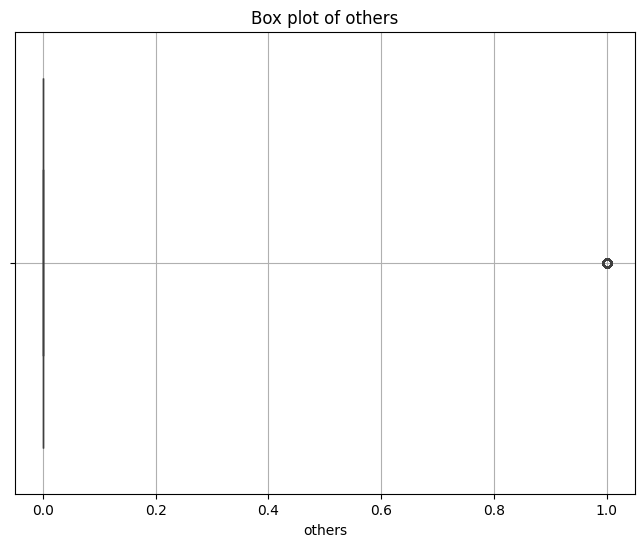


Analysis for column: furnishing_type
Skewness of 'furnishing_type': 1.2152167536922434
Kurtosis of 'furnishing_type': 0.44366852193706885


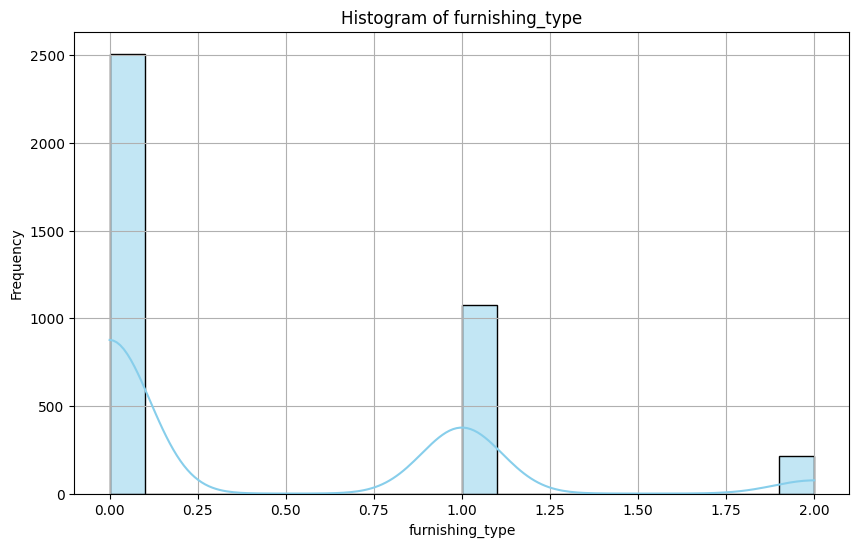

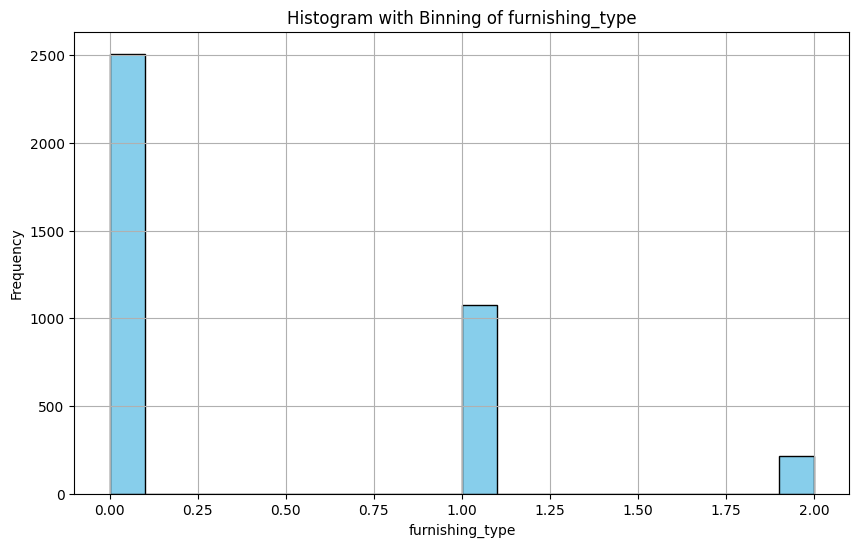

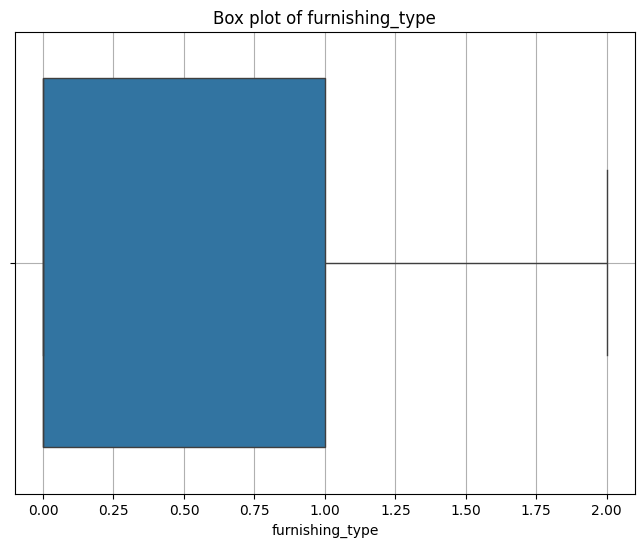


Analysis for column: luxury_score
Skewness of 'luxury_score': 0.47028839425636054
Kurtosis of 'luxury_score': -0.8553365481063526


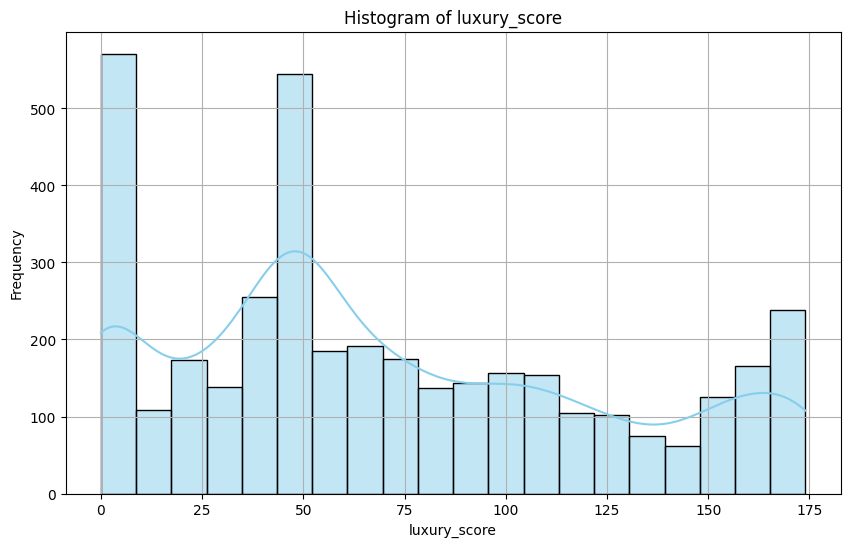

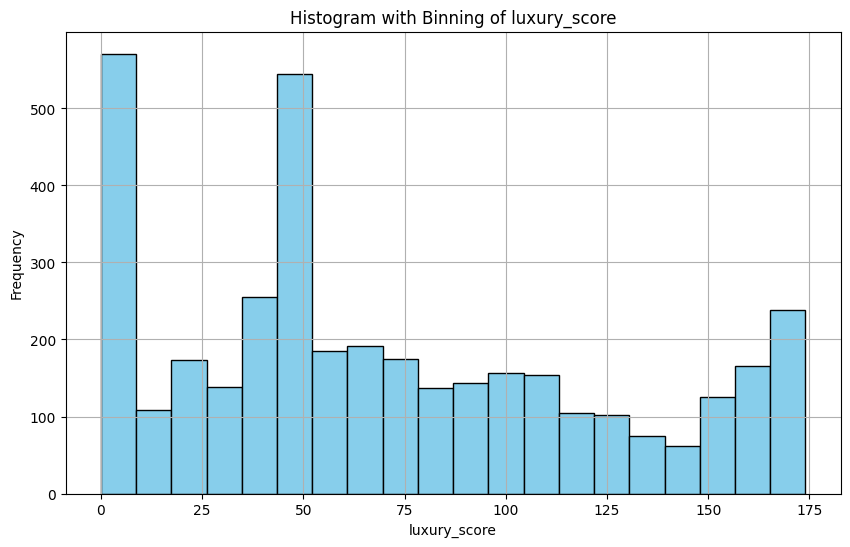

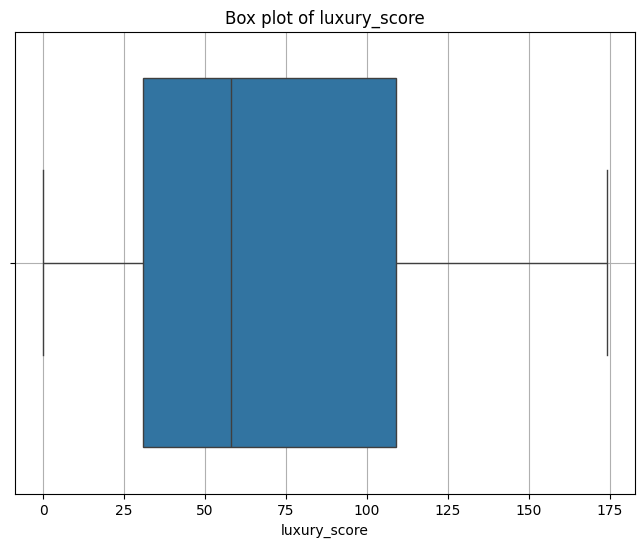

In [ ]:

# Function to analyze a numerical column
def analyze_numerical_column(column_name):

    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in the dataset.")
        return

    numeric_values = pd.to_numeric(df[column_name], errors='coerce').dropna()

    # Compute skewness and kurtosis
    skewness = numeric_values.skew()
    kurtosis = numeric_values.kurtosis()
    print(f"Skewness of '{column_name}': {skewness}")
    print(f"Kurtosis of '{column_name}': {kurtosis}")


    # Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(numeric_values, kde=True, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # Binning
    plt.figure(figsize=(10, 6))
    numeric_values.plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram with Binning of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # Box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=numeric_values)
    plt.title(f'Box plot of {column_name}')
    plt.xlabel(column_name)
    plt.grid(True)
    plt.show()

columns_to_analyze = ['price', 'price_per_sqft','bedRoom', 'bathroom', 'balcony','floorNum','super_built_up_area','built_up_area','carpet_area','study room','servant room','store room','pooja room','others','furnishing_type','luxury_score']
for column in columns_to_analyze:
    print("\nAnalysis for column:", column)
    analyze_numerical_column(column)



Multivariate analysis for column: property_type


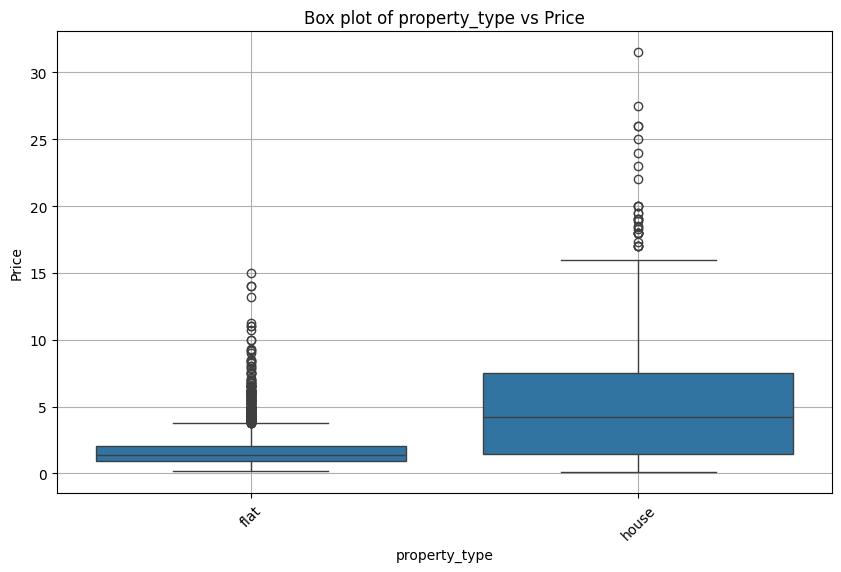

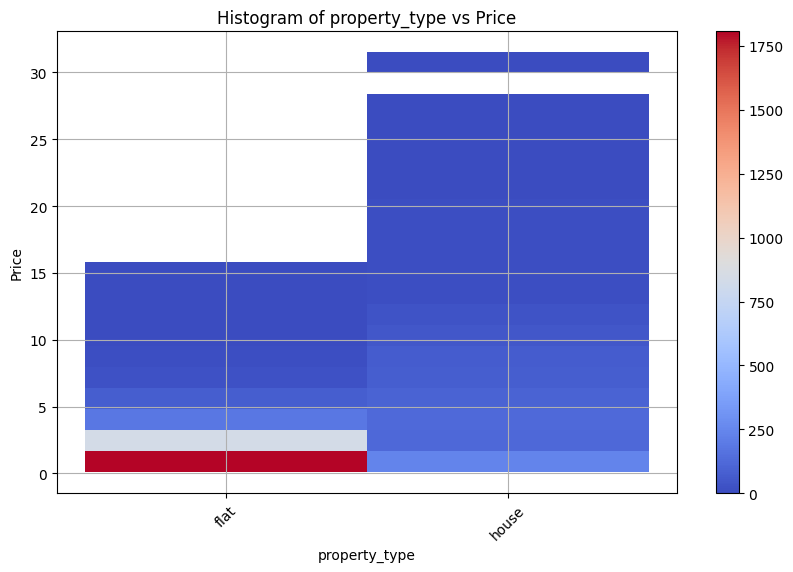


Multivariate analysis for column: availability
Column 'availability' not found in the dataset.

Multivariate analysis for column: area


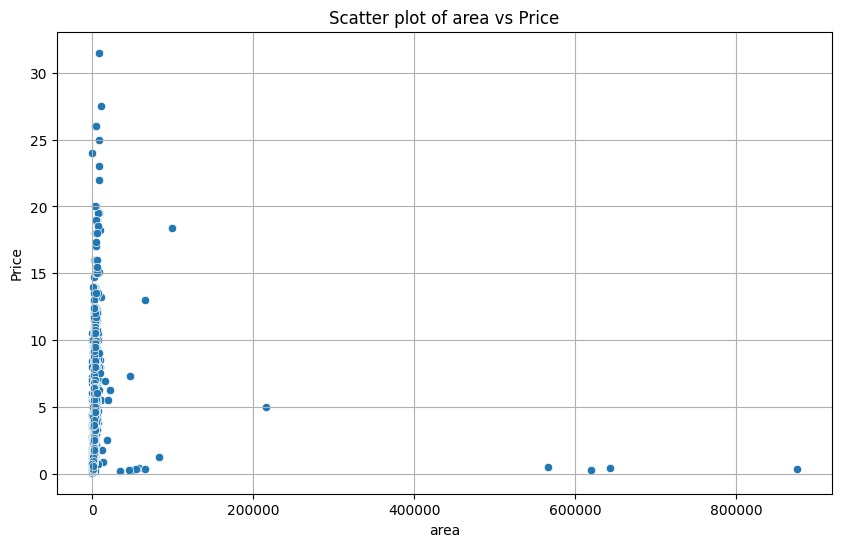

In [ ]:

# Function to perform multivariate analysis for categorical columns
def analyze_categorical_vs_price(column_name):

    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in the dataset.")
        return

    # Box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column_name, y='price', data=df)
    plt.title(f'Box plot of {column_name} vs Price')
    plt.xlabel(column_name)
    plt.ylabel('Price')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

    # Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column_name, y='price', bins=20, cmap='coolwarm', cbar=True)
    plt.title(f'Histogram of {column_name} vs Price')
    plt.xlabel(column_name)
    plt.ylabel('Price')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# Function to perform scatter plot analysis for numerical columns
def analyze_numerical_vs_price(column_name):

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=column_name, y='price', data=df)
    plt.title(f'Scatter plot of {column_name} vs Price')
    plt.xlabel(column_name)
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()


categorical_columns = ['property_type', 'availability']
for column in categorical_columns:
    print("\nMultivariate analysis for column:", column)
    analyze_categorical_vs_price(column)

numerical_columns = ['area']
for column in numerical_columns:
    print("\nMultivariate analysis for column:", column)
    analyze_numerical_vs_price(column)



Multivariate analysis for categorical column: property_type


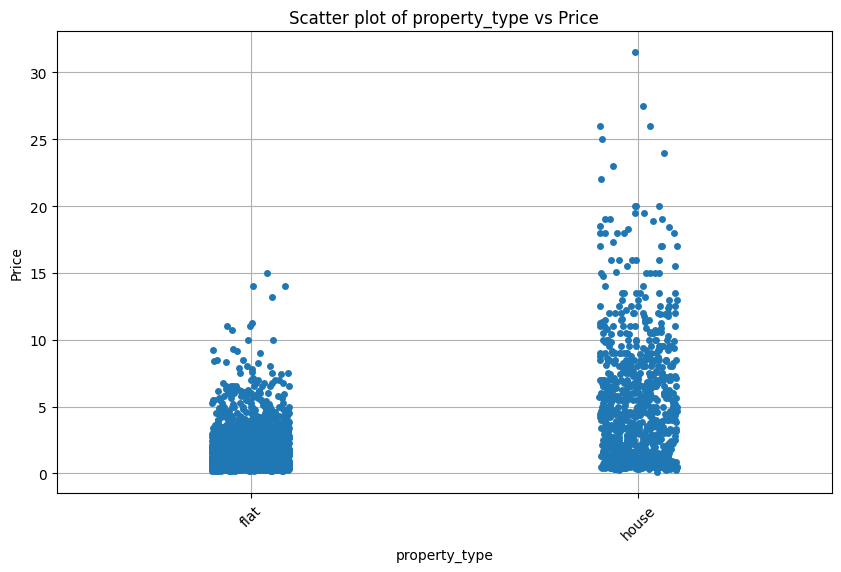


Multivariate analysis for categorical column: society


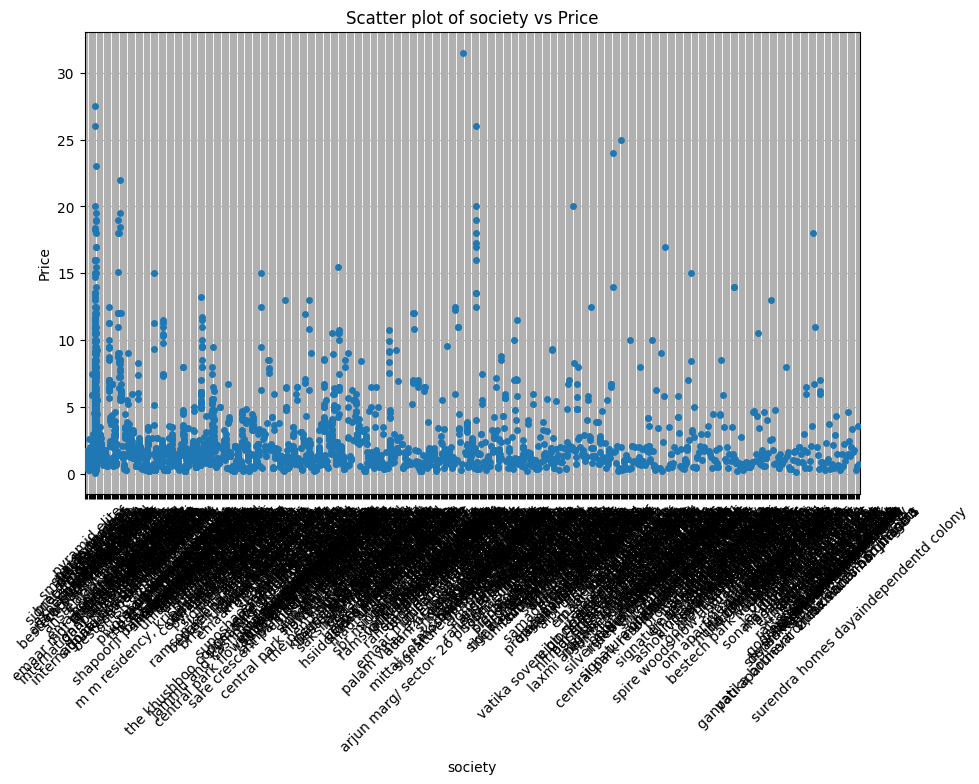


Multivariate analysis for categorical column: sector


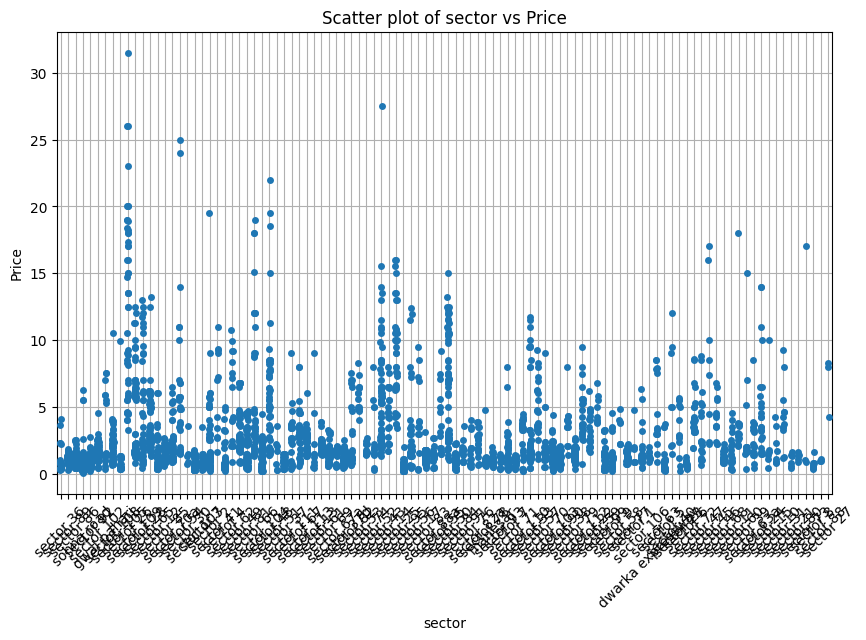


Multivariate analysis for numerical column: price_per_sqft


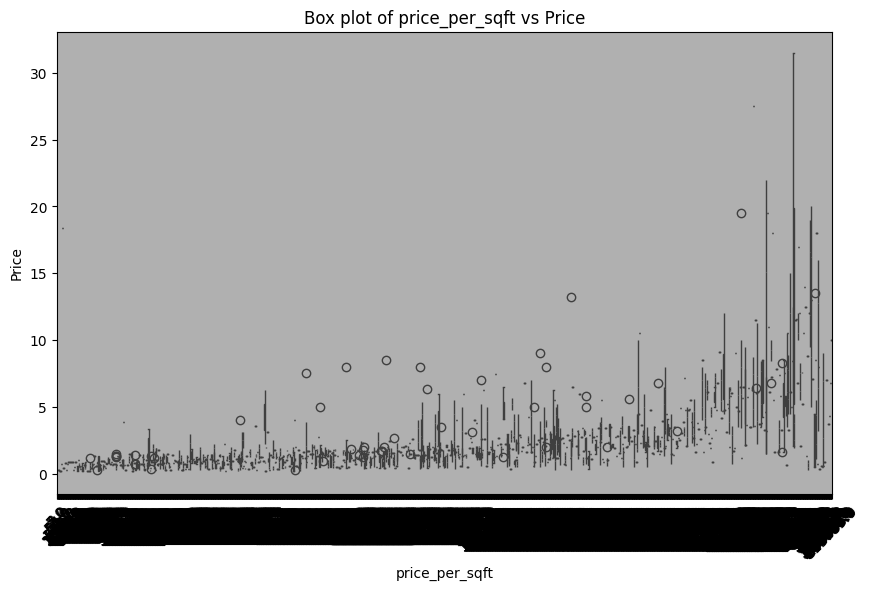


Multivariate analysis for numerical column: area


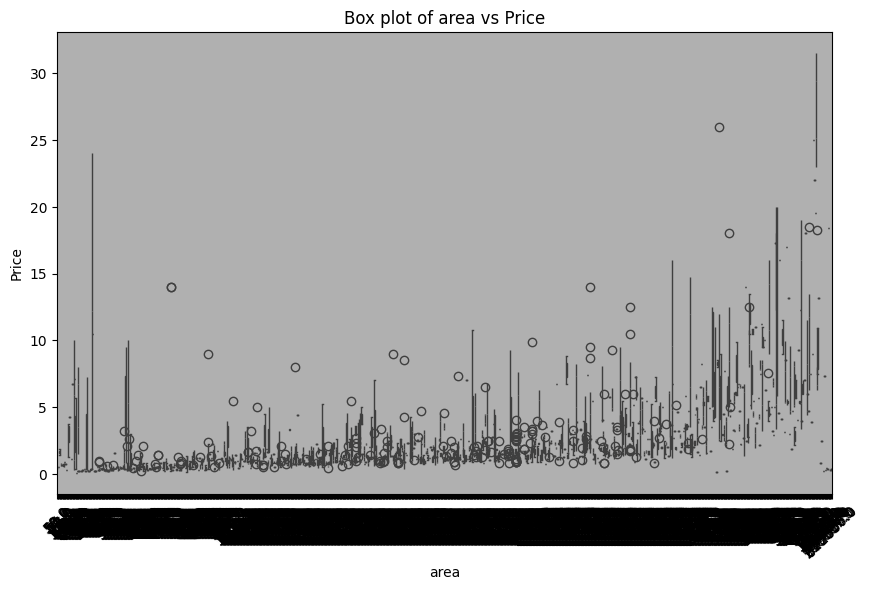


Multivariate analysis for categorical column: areaWithType


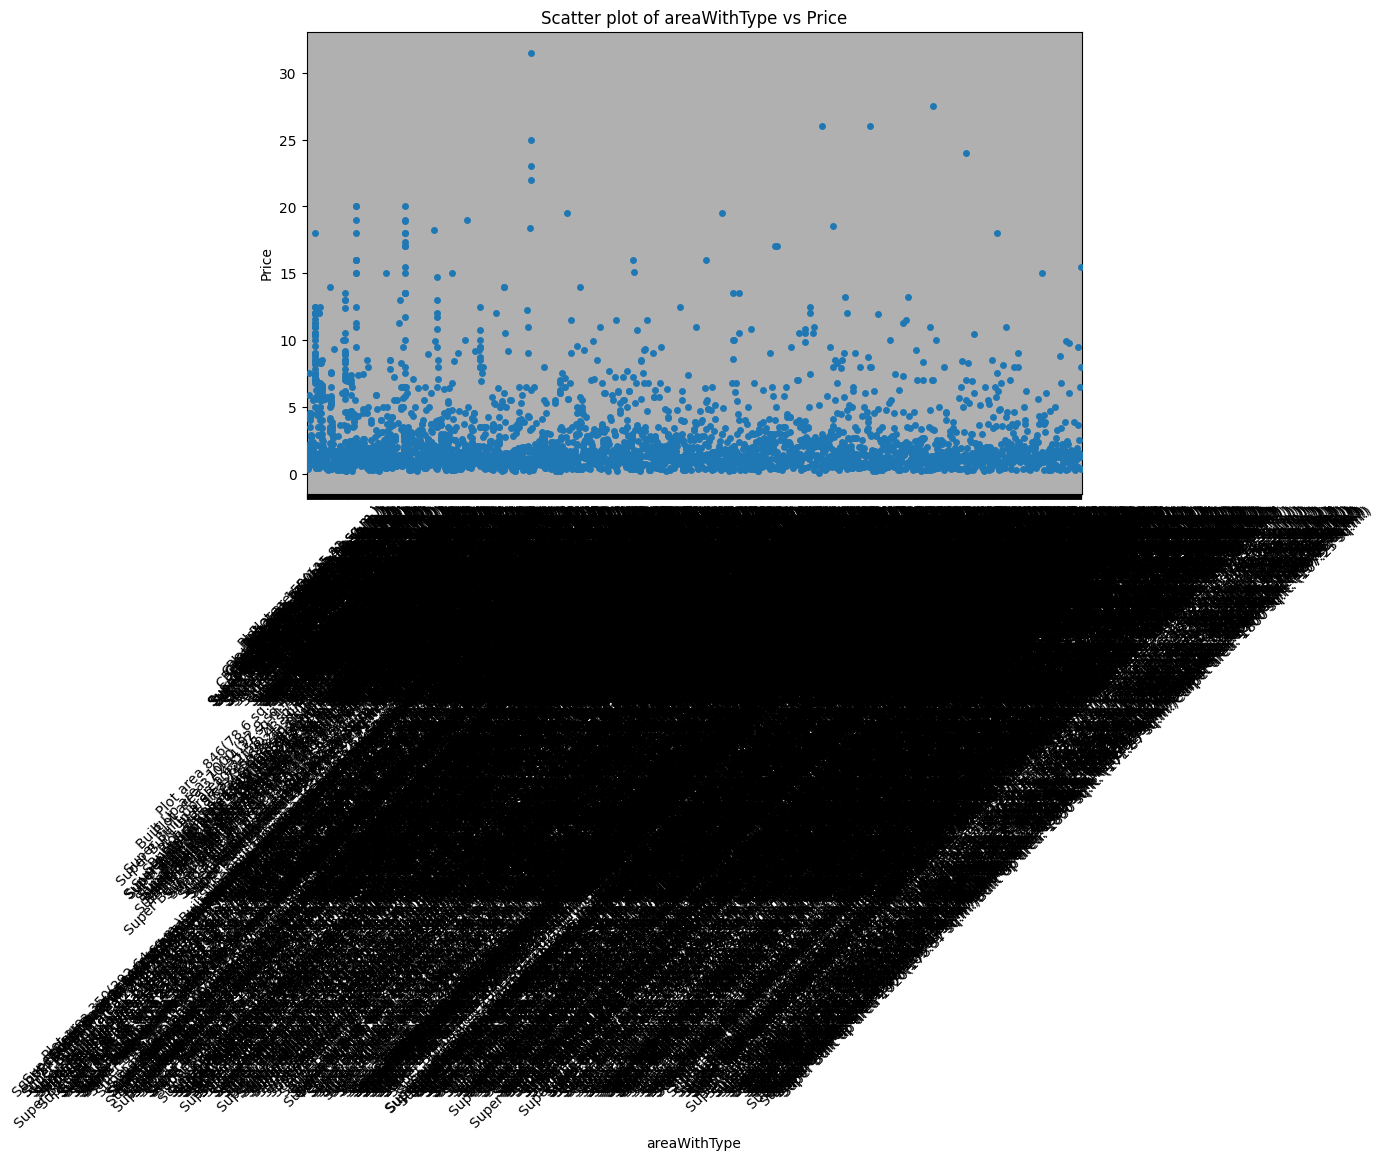


Multivariate analysis for numerical column: bedRoom


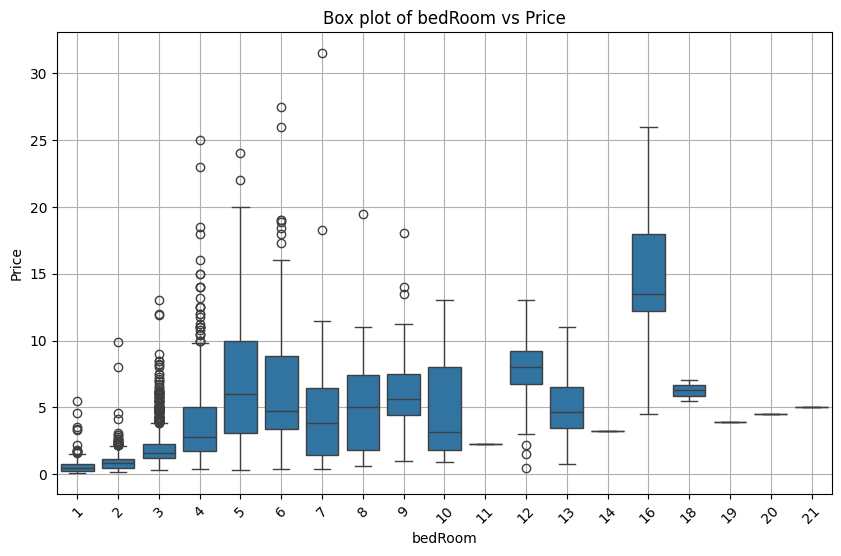


Multivariate analysis for numerical column: bathroom


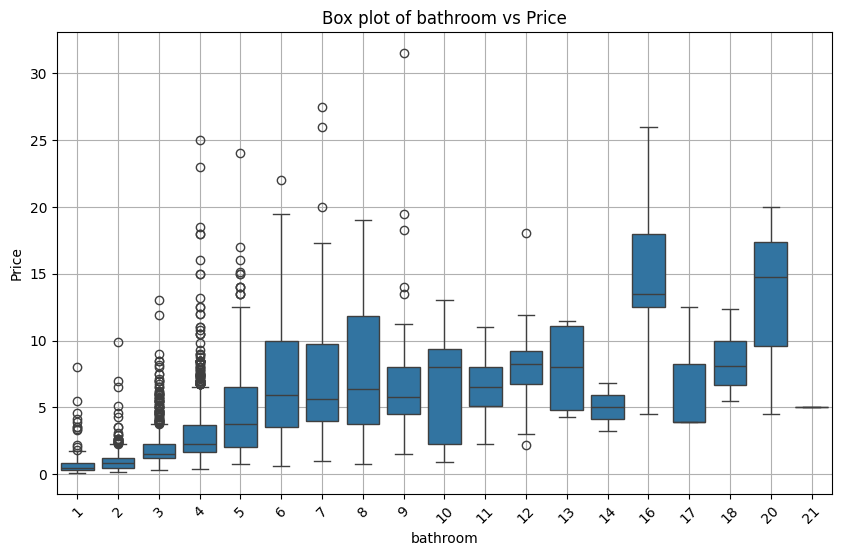


Multivariate analysis for categorical column: balcony


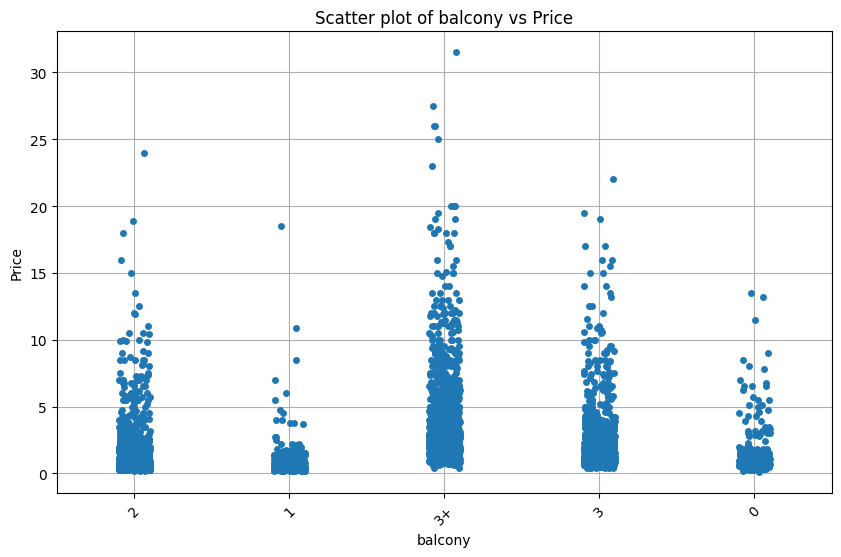


Multivariate analysis for numerical column: floorNum


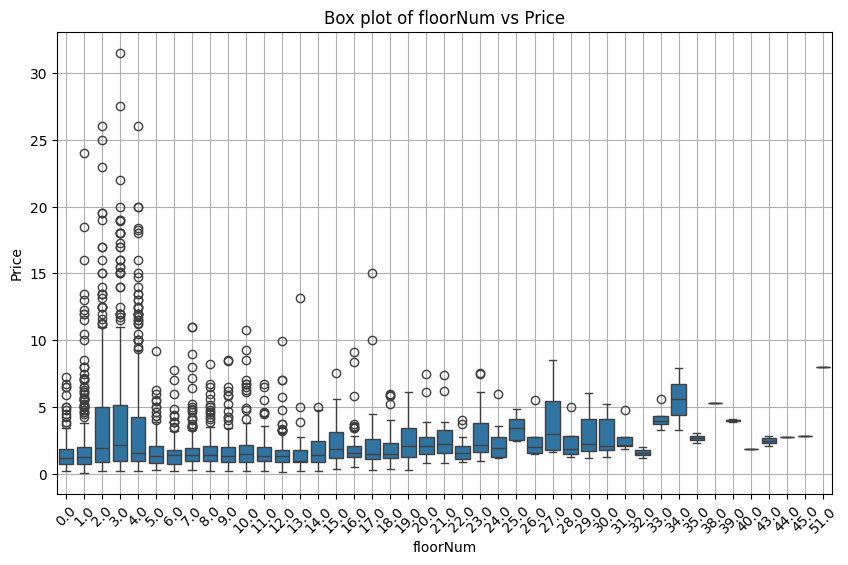


Multivariate analysis for categorical column: facing


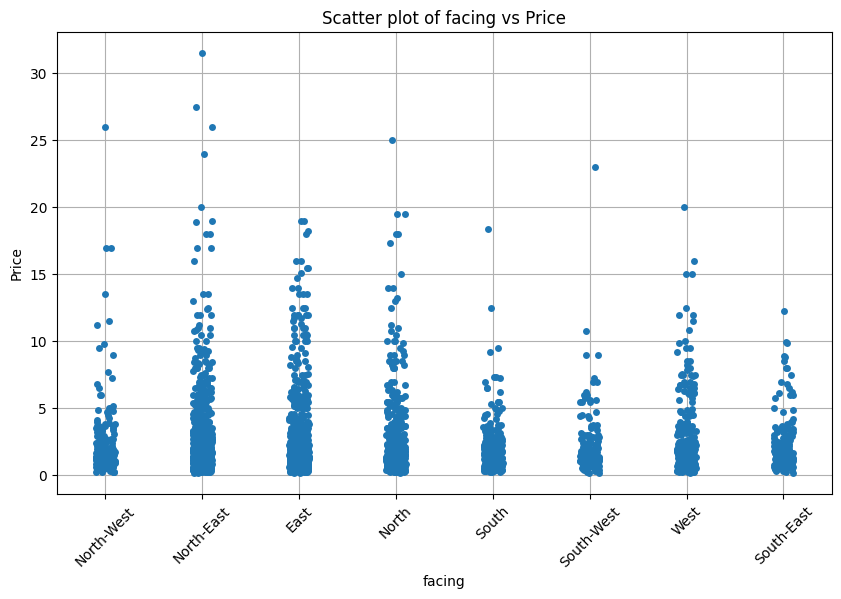


Multivariate analysis for categorical column: agePossession


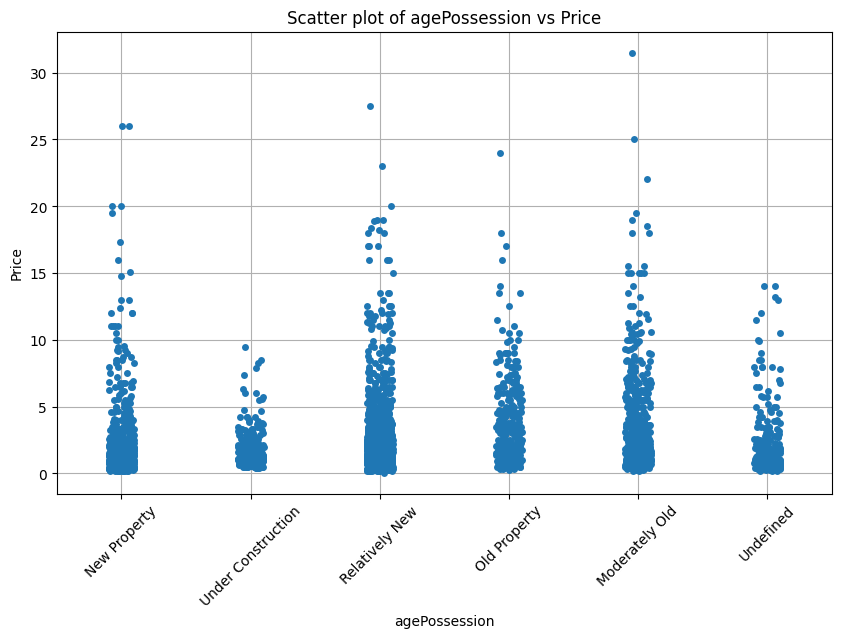


Multivariate analysis for numerical column: super_built_up_area


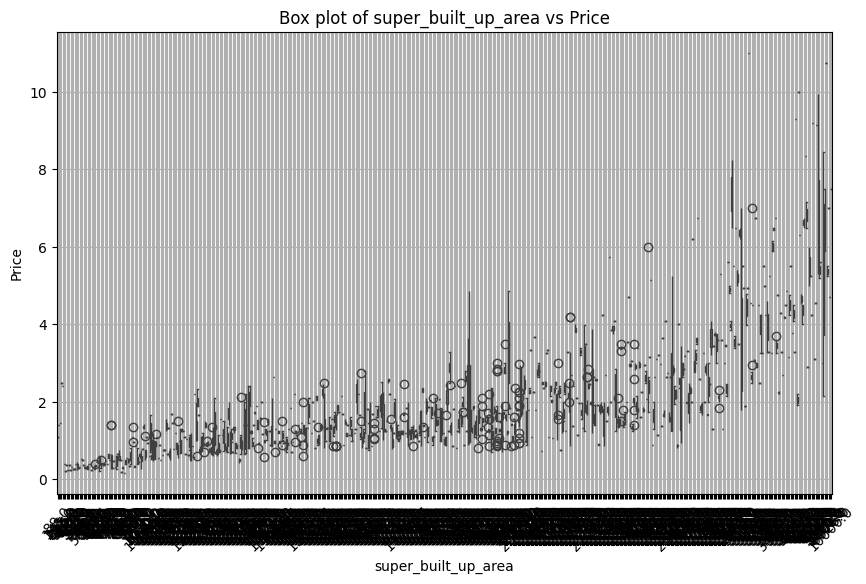


Multivariate analysis for numerical column: built_up_area


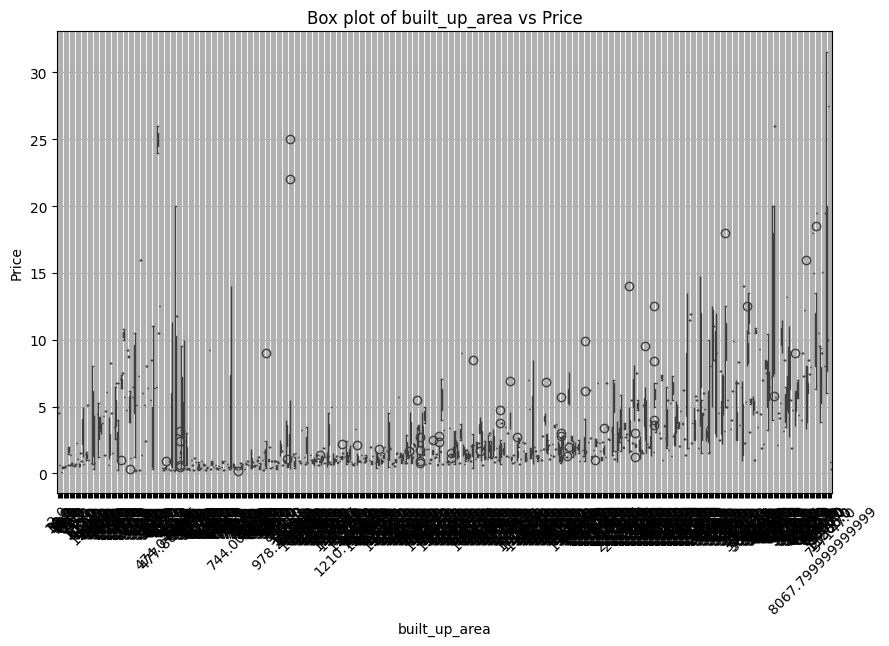


Multivariate analysis for numerical column: carpet_area


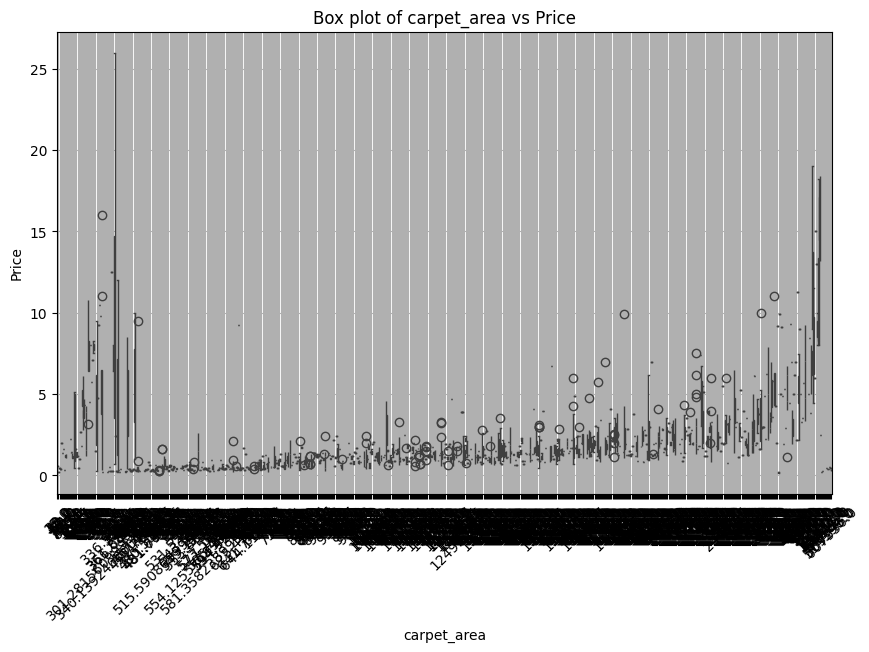


Multivariate analysis for numerical column: study room


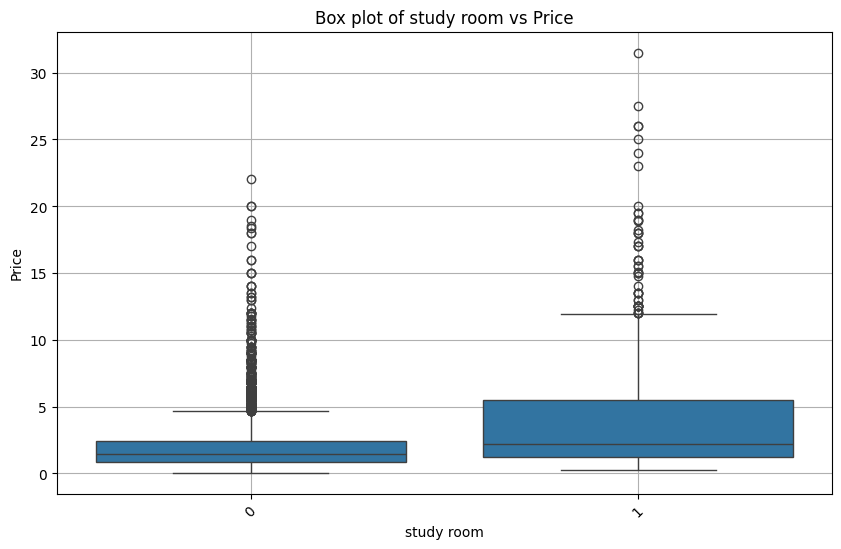


Multivariate analysis for numerical column: servant room


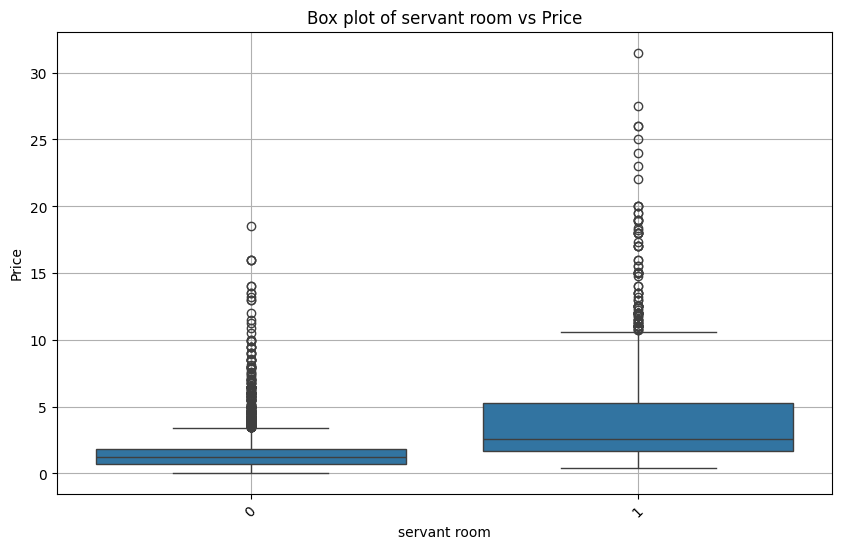


Multivariate analysis for numerical column: store room


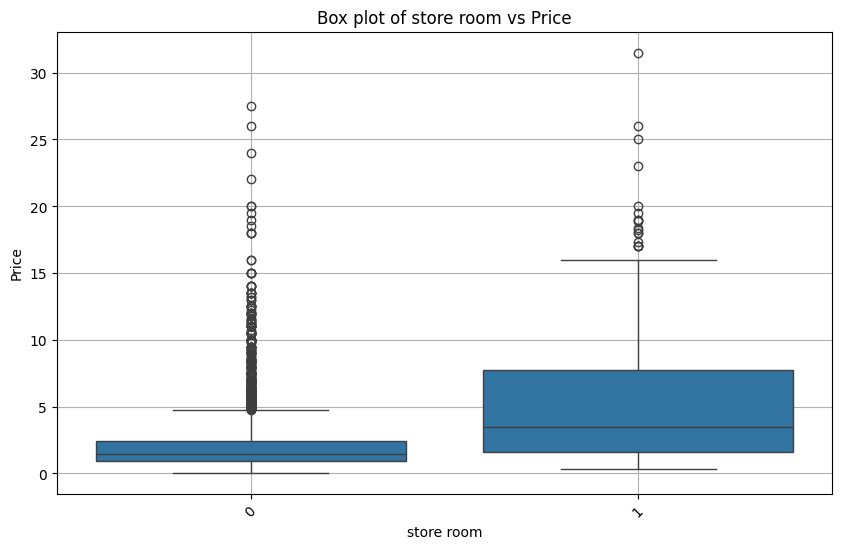


Multivariate analysis for numerical column: pooja room


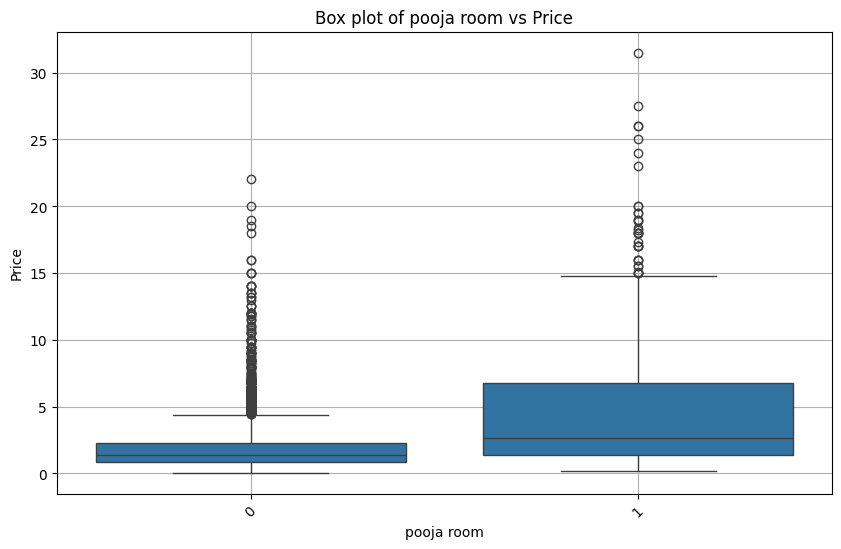


Multivariate analysis for numerical column: others


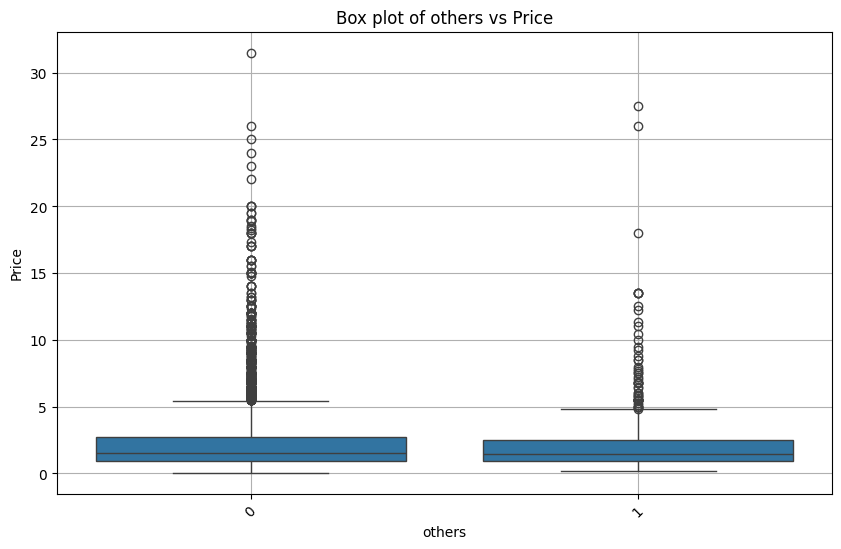


Multivariate analysis for numerical column: furnishing_type


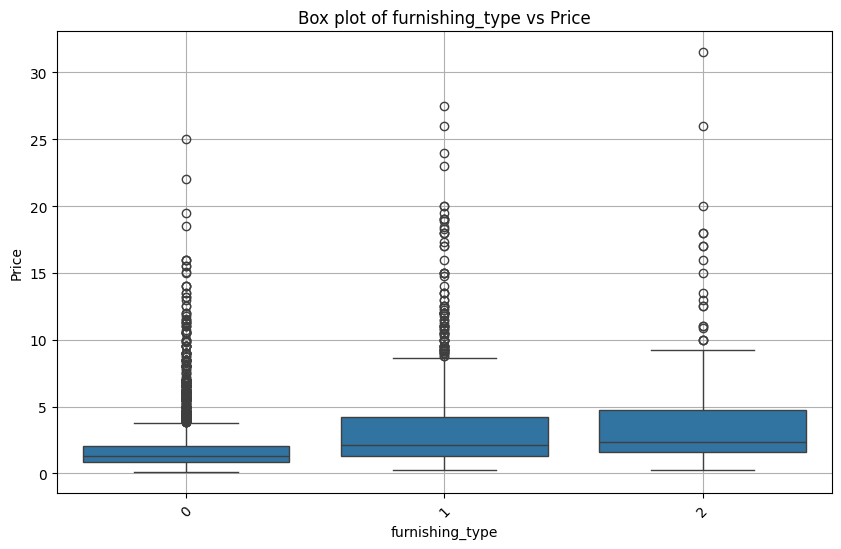


Multivariate analysis for numerical column: luxury_score


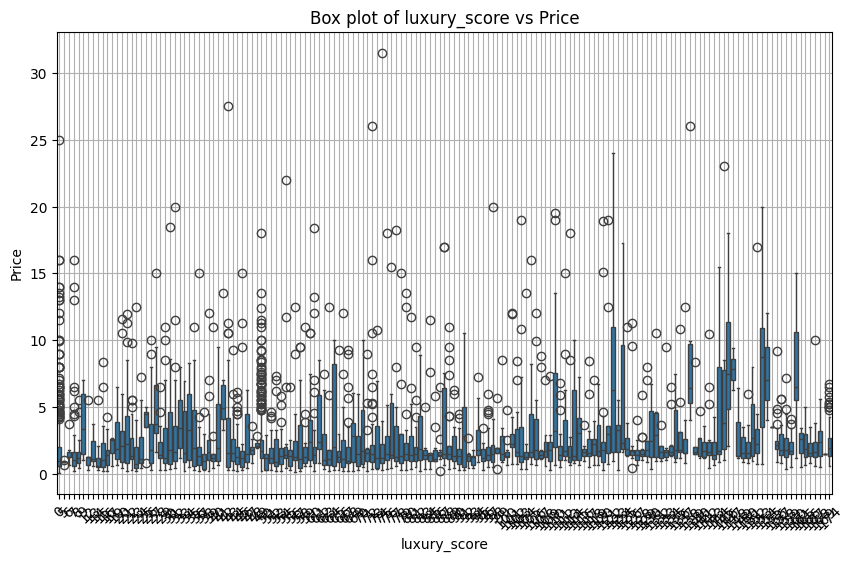

In [ ]:
 # this code is for all columns taking price as main scatter for categorical and box for numerical data

def analyze_categorical_vs_price(column_name):

    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in the dataset.")
        return

    # Strip plot
    plt.figure(figsize=(10, 6))
    sns.stripplot(x=column_name, y='price', data=df, jitter=True)
    plt.title(f'Scatter plot of {column_name} vs Price')
    plt.xlabel(column_name)
    plt.ylabel('Price')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()


def analyze_numerical_vs_price(column_name):
    # Box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column_name, y='price', data=df)
    plt.title(f'Box plot of {column_name} vs Price')
    plt.xlabel(column_name)
    plt.ylabel('Price')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# Multivariate analysis for all columns
for column in df.columns:
    if column != 'price':  # Exclude 'price' column
        if df[column].dtype == 'object':
            print("\nMultivariate analysis for categorical column:", column)
            analyze_categorical_vs_price(column)
        else:
            print("\nMultivariate analysis for numerical column:", column)
            analyze_numerical_vs_price(column)


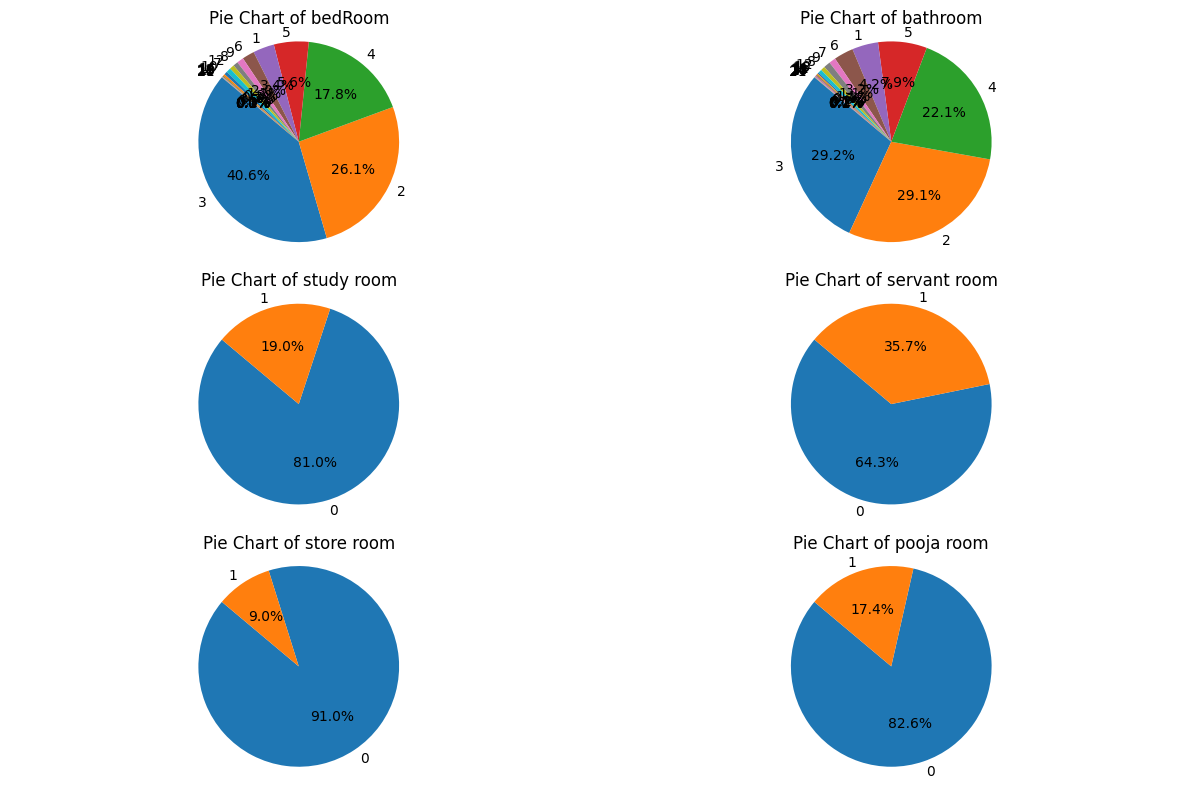

In [ ]:
 #pie charts for rooms

columns = ["bedRoom", "bathroom", "study room","servant room","store room","pooja room"]  # Add more column names as needed

num_rows = len(columns) // 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
if num_rows == 1 and num_cols == 1:
    axes = [axes]
for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col]
    category_counts = df[column].value_counts()
   # Create a pie chart
    ax.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
    ax.set_title('Pie Chart of {}'.format(column))
    ax.axis('equal')

plt.tight_layout()

plt.show()


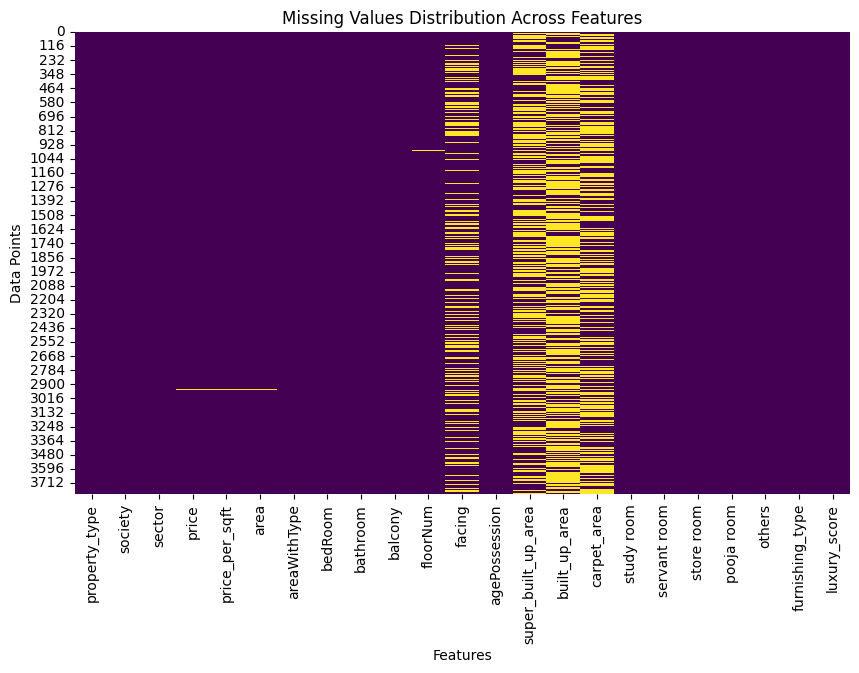

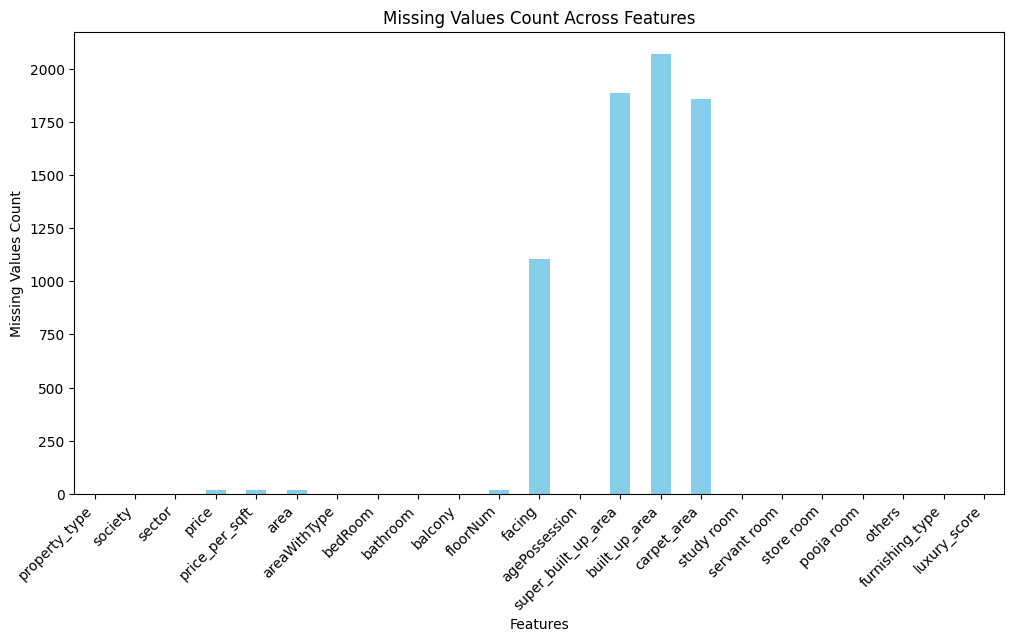

Missing Values Summary:
society                   1
price                    18
price_per_sqft           18
area                     18
floorNum                 19
facing                 1105
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64


In [ ]:
 #checking for missing values across all the features

def analyze_missing_values(df):

    missing_values = df.isnull()

    missing_count = missing_values.sum()

    plt.figure(figsize=(10, 6))
    sns.heatmap(missing_values, cmap='viridis', cbar=False)
    plt.title('Missing Values Distribution Across Features')
    plt.xlabel('Features')
    plt.ylabel('Data Points')
    plt.show()

    plt.figure(figsize=(12, 6))
    missing_count.plot(kind='bar', color='skyblue')
    plt.title('Missing Values Count Across Features')
    plt.xlabel('Features')
    plt.ylabel('Missing Values Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Print summary
    print("Missing Values Summary:")
    print(missing_count[missing_count > 0])

analyze_missing_values(df)


TASK 2


In [ ]:
#simple imputer is a part of random forest

numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    df[feature].fillna(df[feature].median(), inplace=True)  # Impute with median

categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    df[feature].fillna(df[feature].mode()[0], inplace=True)  # Impute with mode

df.dropna(inplace=True)

missing_values_after_handling = df.isnull().sum().sum()
print("Total missing values after handling:", missing_values_after_handling)


Total missing values after handling: 0


In [ ]:

#MULTIPLE IMPUTATION METHOD TO AVOID MEAN MEDIAN MODE

# use method called iterative imputer and simple imputer FOR CATEGORICAL AND NUMERIC
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer


numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

imputer_numeric = IterativeImputer(random_state=0)
df_numerical_imputed = pd.DataFrame(imputer_numeric.fit_transform(df[numerical_columns]), columns=numerical_columns)

imputer_categorical = SimpleImputer(strategy='most_frequent')
df_categorical_imputed = pd.DataFrame(imputer_categorical.fit_transform(df[categorical_columns]), columns=categorical_columns)

df_imputed = pd.concat([df_numerical_imputed, df_categorical_imputed], axis=1)

print("Number of missing values after imputation:")
print(df_imputed.isnull().sum())



Number of missing values after imputation:
price                  0
price_per_sqft         0
area                   0
bedRoom                0
bathroom               0
floorNum               0
super_built_up_area    0
built_up_area          0
carpet_area            0
study room             0
servant room           0
store room             0
pooja room             0
others                 0
furnishing_type        0
luxury_score           0
property_type          0
society                0
sector                 0
areaWithType           0
balcony                0
facing                 0
agePossession          0
dtype: int64


In [ ]:

# Handled missing values
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    df[feature].fillna(df[feature].mean(), inplace=True)

df.to_csv('Gurgaon_RealEstate_Handled.csv', index=False)

handled_data = pd.read_csv('Gurgaon_RealEstate_Handled.csv')

missing_values_after_handling = handled_data.isnull().sum().sum()
print("Total missing values after handling:", missing_values_after_handling)
num_observations_before = len(df)
num_observations_after = len(handled_data)
print("Number of observations before handling:", num_observations_before)
print("Number of observations after handling:", num_observations_after)

print("\nOriginal Data:")
print(df.head())
print("\nHandled Data:")
print(handled_data.head())


Total missing values after handling: 0
Number of observations before handling: 3803
Number of observations after handling: 3803

Original Data:
  property_type                      society      sector  price  \
0          flat      signature global park 4   sector 36   0.82   
1          flat             smart world gems   sector 89   0.95   
2          flat                pyramid elite   sector 86   0.46   
3          flat       breez global hill view  sohna road   0.32   
4          flat  bestech park view sanskruti   sector 92   1.60   

   price_per_sqft     area                                       areaWithType  \
0          7585.0   1081.0  Super Built up area 1081(100.43 sq.m.)Carpet a...   
1          8600.0   1105.0                   Carpet area: 1103 (102.47 sq.m.)   
2            79.0  58228.0                 Carpet area: 58141 (5401.48 sq.m.)   
3          5470.0    585.0  Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...   
4          8020.0   1995.0  Super Built up area 

TASK 3


In [ ]:

# Select numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64'])

z_score_threshold = 3
z_scores = ((numerical_features - numerical_features.mean()) / numerical_features.std()).abs()
outliers_zscore = z_scores[(z_scores > z_score_threshold).any(axis=1)].index

print("Outliers detected by Z-score method:", outliers_zscore)

Outliers detected by Z-score method: Index([   2,    5,    6,   17,   19,   20,   25,   26,   30,   31,
       ...
       3741, 3746, 3750, 3752, 3774, 3791, 3794, 3799, 3801, 3802],
      dtype='int64', length=618)


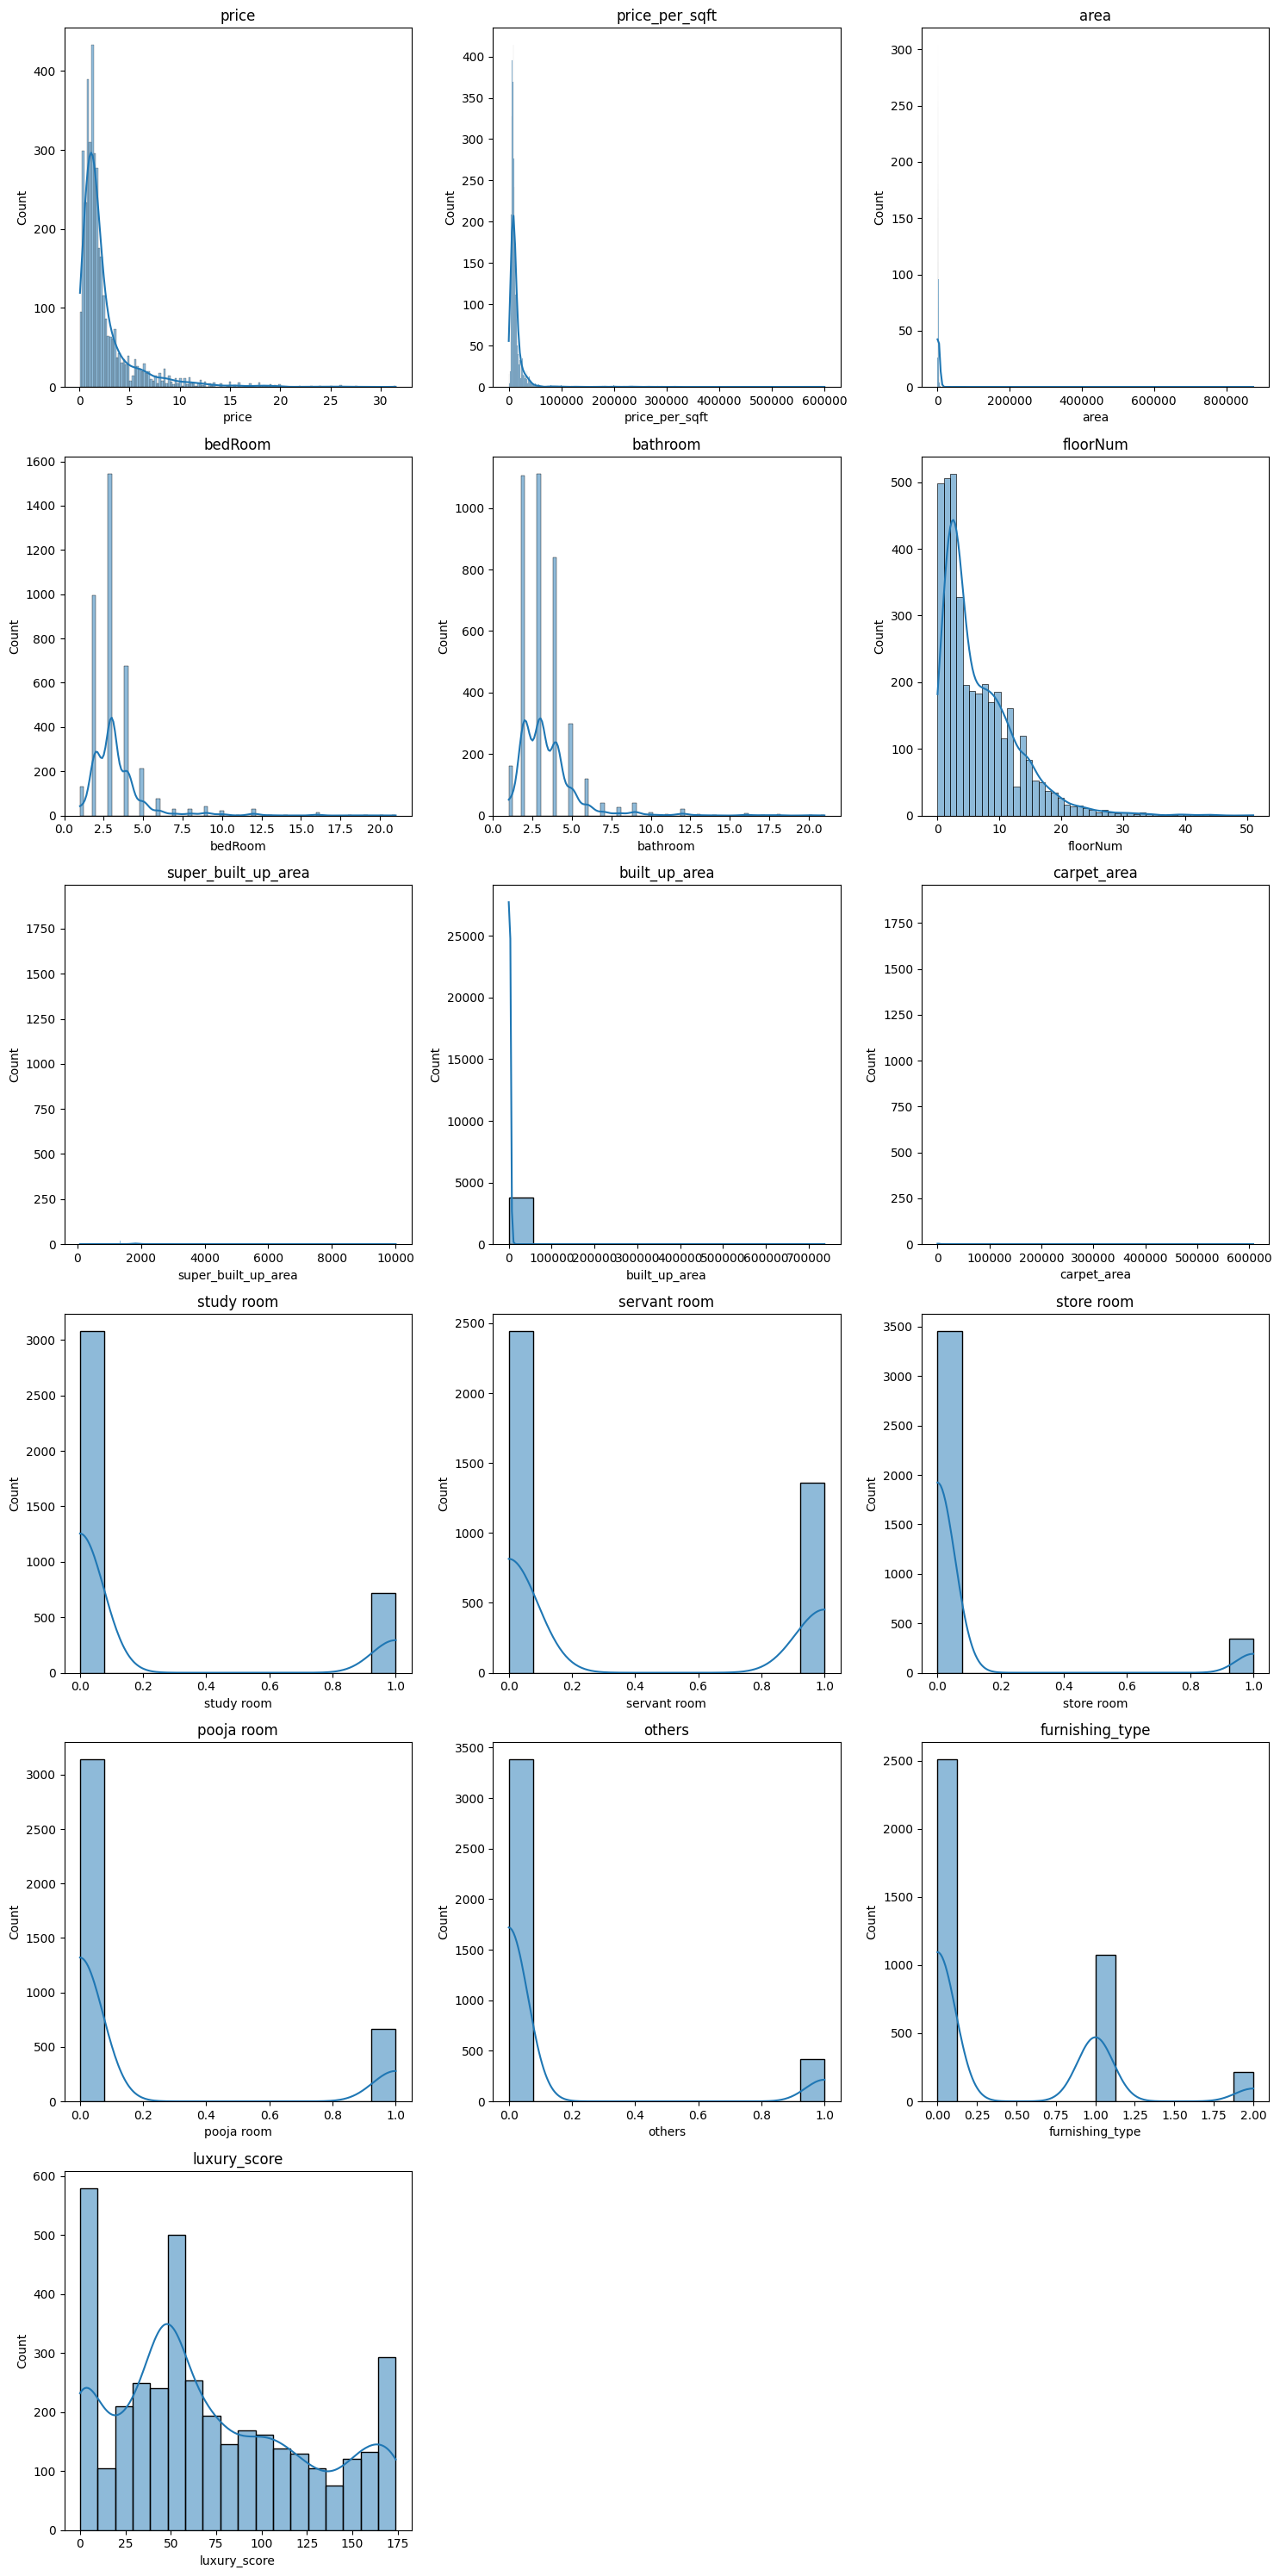

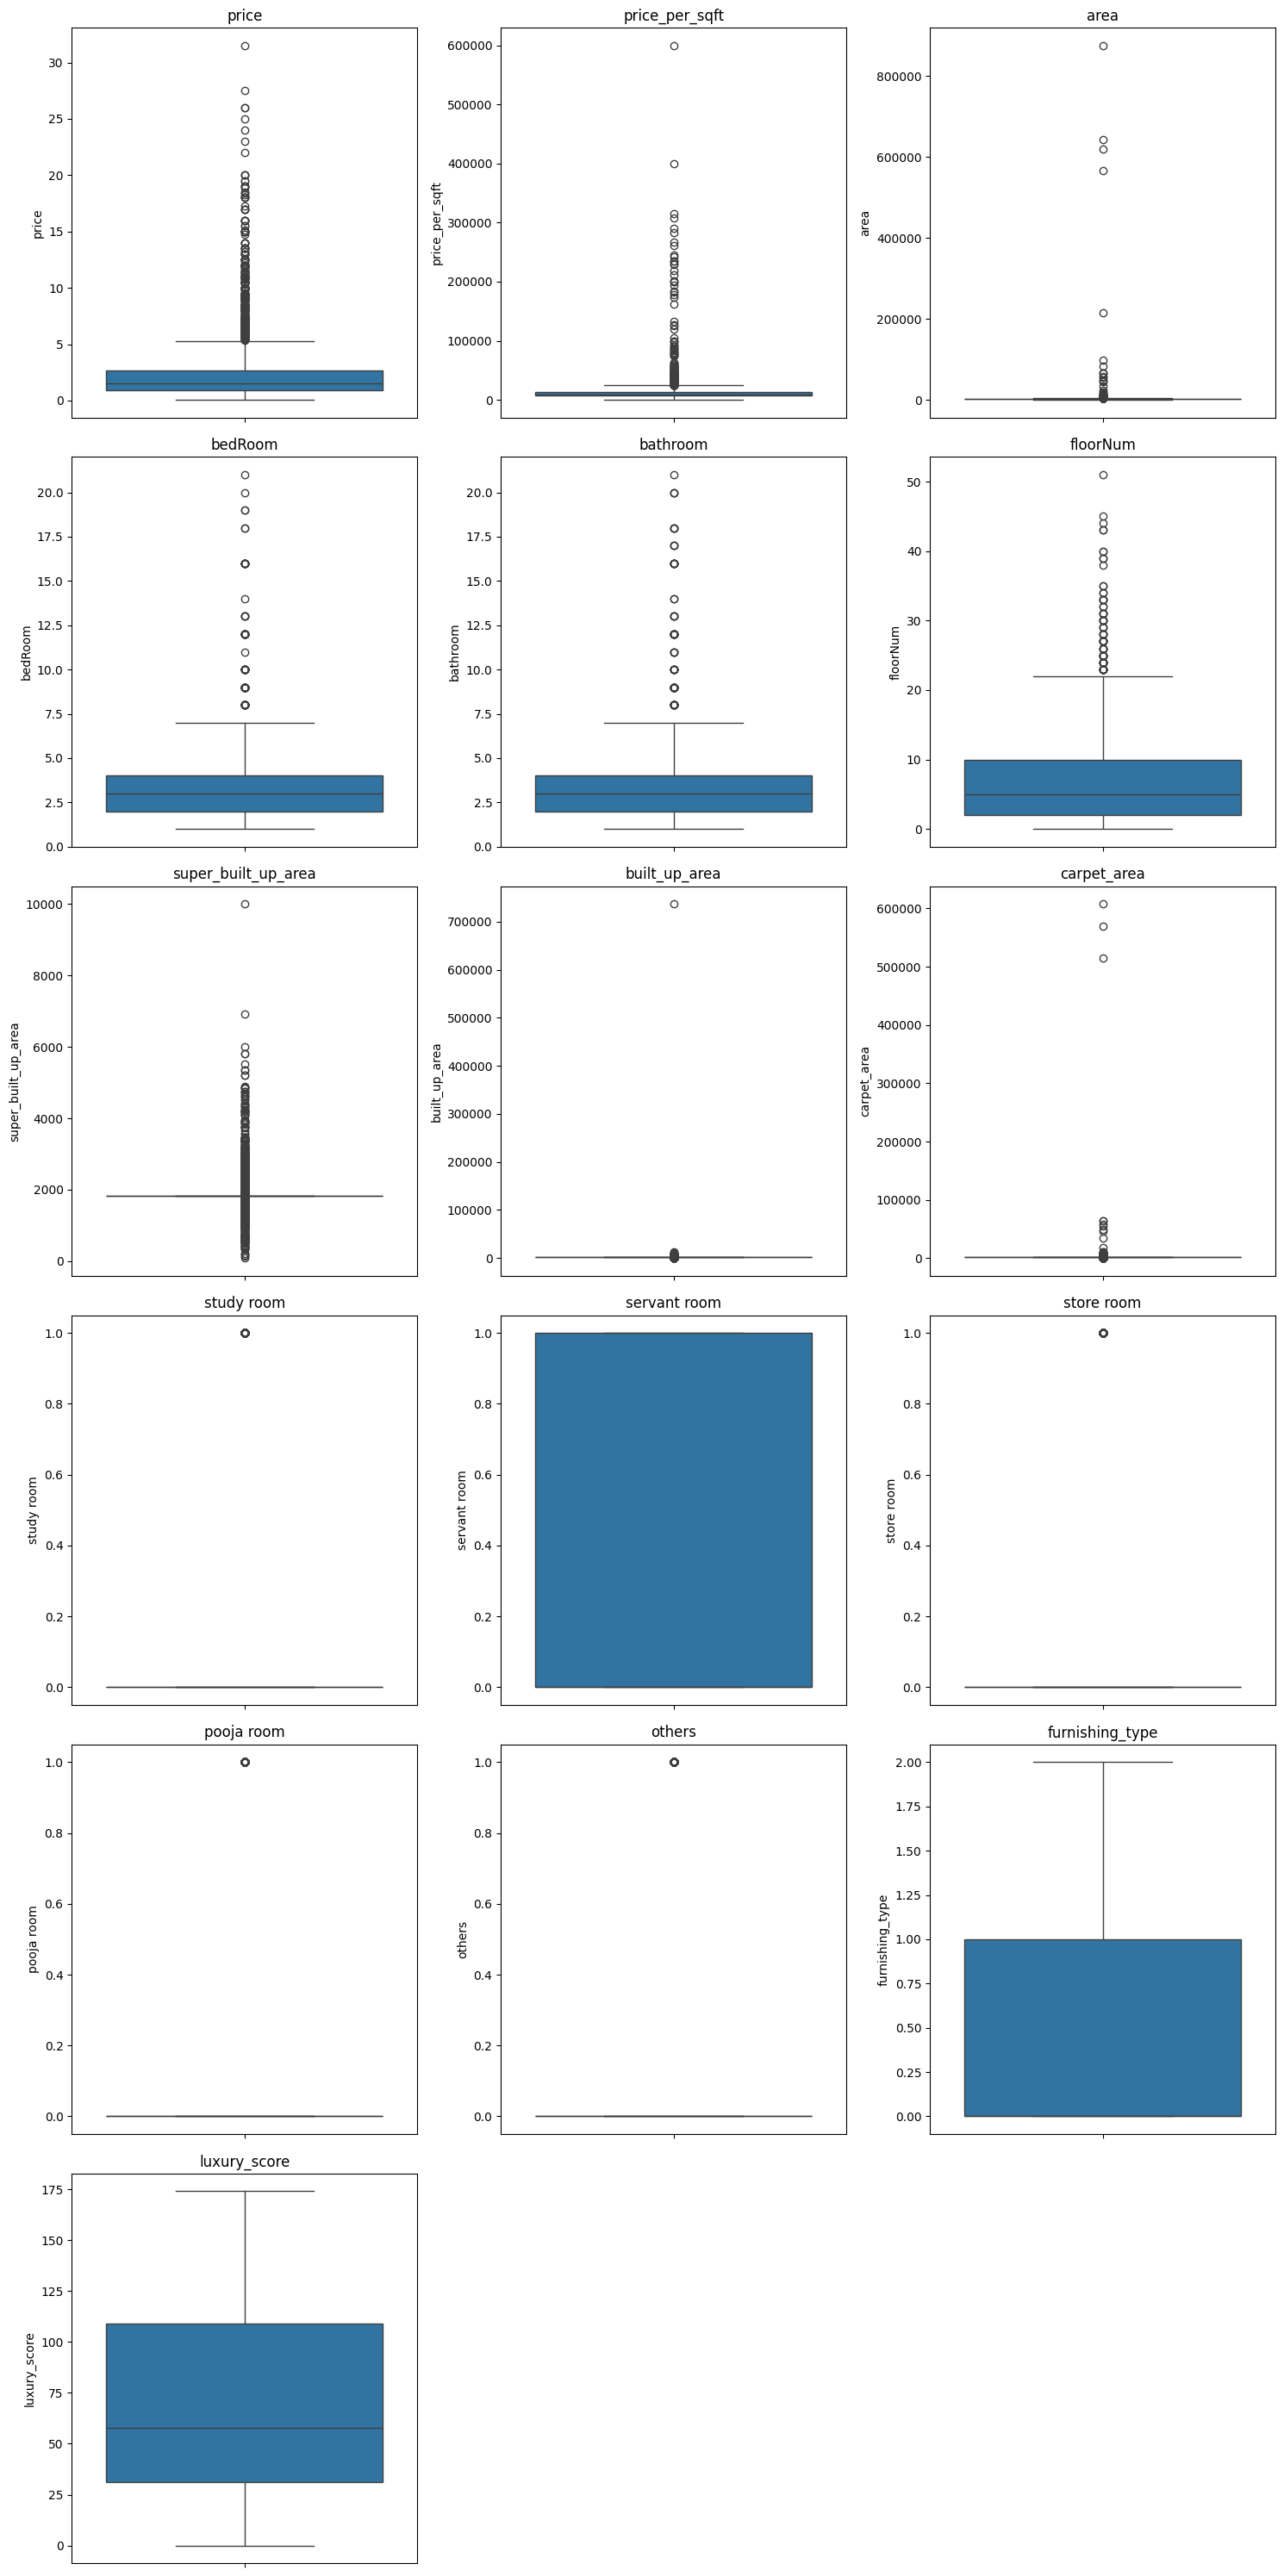

Descriptive Statistics:
             price  price_per_sqft           area      bedRoom     bathroom  \
count  3803.000000     3803.000000    3803.000000  3803.000000  3803.000000   
mean      2.501044    13777.448067    2840.693663     3.338154     3.405469   
std       2.943939    22999.733092   22729.483145     1.876734     1.930456   
min       0.070000        4.000000      50.000000     1.000000     1.000000   
25%       0.945000     6812.500000    1225.000000     2.000000     2.000000   
50%       1.500000     9000.000000    1725.000000     3.000000     3.000000   
75%       2.700000    13750.000000    2290.000000     4.000000     4.000000   
max      31.500000   600000.000000  875000.000000    21.000000    21.000000   

         floorNum  super_built_up_area  built_up_area    carpet_area  \
count  3803.00000          3803.000000    3803.000000    3803.000000   
mean      6.80121          1875.161596    1973.651951    1902.026226   
std       6.01383           546.326958   11964.9

In [ ]:

# Select numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64'])

num_features = len(numerical_features.columns)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

plt.figure(figsize=(15, 5*num_rows))
for i, col in enumerate(numerical_features.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5*num_rows))
for i, col in enumerate(numerical_features.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Display descriptive statistics
print("Descriptive Statistics:")
print(numerical_features.describe())


TASK-4



In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("Gurgaon_RealEstate_Handled.csv")

X = df.drop('price', axis=1)
y = df['price']

le = LabelEncoder()
X = X.apply(le.fit_transform)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

def trimming(df, lower_quantile=0.01, upper_quantile=0.99):
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        lower_bound = df[col].quantile(lower_quantile)
        upper_bound = df[col].quantile(upper_quantile)
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

X_train_trimmed = trimming(X_train.copy())
X_test_trimmed = trimming(X_test.copy())

X_train_trimmed = X_train_trimmed.reset_index(drop=True)

y_train = y_train.reset_index(drop=True)
y_train_trimmed = y_train.iloc[X_train_trimmed.index]
y_test_trimmed = y_test[X_test_trimmed.index]

#RANDOM FOREST ALGORITHM
rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)
mse_no_handling = evaluate_model(rf_model, X_test, y_test)

rf_model.fit(X_train_trimmed, y_train_trimmed)
mse_trimming = evaluate_model(rf_model, X_test_trimmed, y_test_trimmed)

print("MSE without outlier handling:", mse_no_handling)
print("MSE with trimming:", mse_trimming)

MSE without outlier handling: 0.7984836634034164
MSE with trimming: 6.734314245813704


In [ ]:
#BROWNIE POINTS

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error


data = data.dropna(subset=['price'])

X = data.drop(columns=['price'])
y = data['price']

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_processed = preprocessor.fit_transform(X)

onehot_columns = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_features = numeric_features + list(onehot_columns)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
important_features_rf_indices = indices[:10]
important_features_rf = [all_features[i] for i in important_features_rf_indices]

print("Random Forest Feature Importances:")
for f in range(len(important_features_rf)):
    print(f"{important_features_rf[f]}: {importances[important_features_rf_indices[f]]}")

# Using top features
X_train_rf = X_train[:, important_features_rf_indices]
X_test_rf = X_test[:, important_features_rf_indices]


def train_and_evaluate(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    return model, y_pred

print("\nTraining and evaluating Random Forest with features selected by Random Forest:")
model_rf, y_pred_rf = train_and_evaluate(X_train_rf, X_test_rf, y_train, y_test)

# Displaying the first few predictions
print("\nFirst few predictions:")
print(y_pred_rf[:5])
print("Actual prices:")
print(y_test[:5].values)


Random Forest Feature Importances:
price_per_sqft: 0.5753349521702669
area: 0.37506468318411096
built_up_area: 0.008458888846452134
sector_sector 26: 0.0075250429121113795
areaWithType_Plot area 1000(836.13 sq.m.): 0.005992868457695009
bathroom: 0.003384907745415635
areaWithType_Built Up area: 700 (65.03 sq.m.): 0.0023558900083576633
luxury_score: 0.001818256149441036
areaWithType_Plot area 402(336.12 sq.m.)Built Up area: 400 sq.yards (334.45 sq.m.)Carpet area: 350 sq.yards (292.64 sq.m.): 0.00166596189964447
bedRoom: 0.0014718531617673451

Training and evaluating Random Forest with features selected by Random Forest:
Mean Squared Error: 0.7017813033723603

First few predictions:
[ 2.1411  1.2469 11.736   0.2854  4.3861]
Actual prices:
[ 2.15  1.25 12.    0.29  4.1 ]
